<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

$$
D \propto \frac{R_p}{R_s}
$$

In [74]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [75]:
import os
!python --version
print('conda environment: {}'.format(os.environ['CONDA_DEFAULT_ENV']))

Python 3.6.1 :: Continuum Analytics, Inc.
conda environment: astroconda35


In [76]:
from datetime import datetime as dt
print('Last edit on: {}'.format(dt.now()))

Last edit on: 2018-02-08 13:10:14.243286


# Tutorial 2 | Astronomy Series: Exoplanet demographics

In this tutorial, we will learn how to:
* plot distributions to visualize relations between parameters
* ask relevant questions based on the results
* determine the most interesting targets (i.e. Earth-like planets) based on some criteria

Note: If you want to run the following Python scripts, please make sure you have Python and Jupyter notebook installed. If you are unsure how to do this, check out our [another tutorial](https://jpdeleon.github.io/2016-11-29-Python-Set-up/) on how to set-up your machine. Check also the first part of this tutorial series [here](https://jpdeleon.github.io/2016-12-05-Exoplanet-Goldrush/). See the meaning (e.g. units) of the columns [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html).

In [77]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

figloc='/home/jp/Pictures/research/thesis_figs'

#styling
pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize = 16

In [78]:
import transit_tools as tt

df = tt.download_nexsci(replace=False)

In [79]:
print('Number of Detected Planets per Technique:\n')
df['pl_discmethod'].value_counts()

Number of Detected Planets per Technique:



Transit                          2804
Radial Velocity                   665
Microlensing                       53
Imaging                            44
Transit Timing Variations          15
Eclipse Timing Variations           9
Orbital Brightness Modulation       6
Pulsar Timing                       6
Pulsation Timing Variations         2
Astrometry                          1
Name: pl_discmethod, dtype: int64

According to [wikipedia](https://en.wikipedia.org/wiki/DENIS-P_J082303.1-491201_b), this was discovered by transit photometry. We should be careful on taking the values in the database. We should double check their main sources to be accurate especially on their derived parameters and uncertainties.

# Semi-major axis - Radius Relation

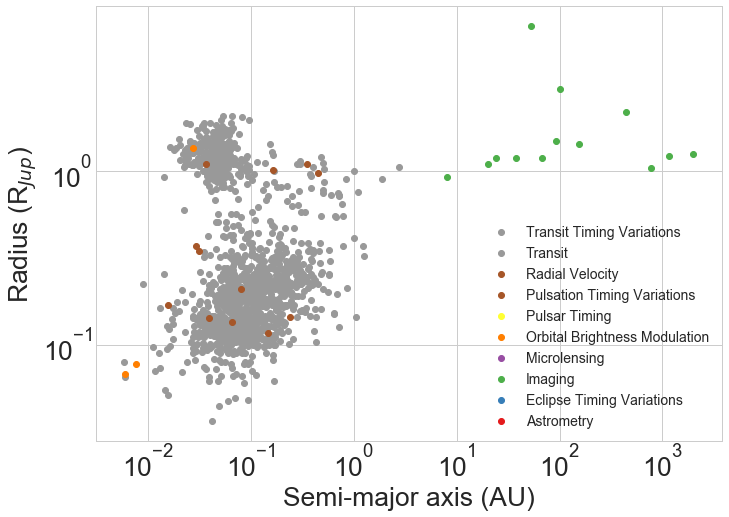

In [80]:
# import mpld3
# mpld3.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})

import numpy as np
#set plotting style
plt.style.use('seaborn-whitegrid')
#set font size
plt.rcParams.update({'font.size': 22})

import matplotlib.cm as cm

groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in list(zip(groups,colors))[::-1]: #plot in reverse order for visual clarity
    ax.plot(group[1]['pl_orbsmax'],group[1]['pl_radj'], 'o', 
            color=color,label=group[0]);#, alpha=0.3);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.legend(fontsize=14)

## Young transiting exoplanets (in situ or inward migration?)
* [Mann+2016](https://www.noao.edu/news/2016/pr1602.php)

```
An enduring puzzle about exoplanets is their prevalence at orbital distances much closer to their central stars than the planets in our own Solar System. How did they get there? One scenario holds that they were born and bred in the hot inner disk close to the star. Other scenarios propose that the close-in planet population originated in cooler climes, at distances beyond the orbit of the Earth, and migrated inward to where they now reside. Their migration may have been driven by interactions with either the natal disk, with other planets in the same planetary system, or with more distant stars.

These scenarios can be tested observationally by searching for young planets and studying their orbits. If the close-in population formed in place or migrated in through interactions with the natal disk, they reach their final orbital distances early on and will be found close in at young ages. In comparison, migrating a planet inward through interactions with other planets or more distant stars is effective on much longer timescales. If the latter processes dominate, planets will not be found close to their stars when they are young.

The existence of K2-33b demonstrates that some close-in planets achieve their final orbital distances early on. These planets either form close to the star or migrate there through interactions with the natal disk. 
```

In [81]:
df.columns

Index(['pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_disc', 'pl_pnum',
       'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj',
       'pl_radj', 'pl_dens', 'pl_instrument', 'pl_insol', 'pl_eqt',
       'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandepn',
       'pl_trandur', 'pl_trandurerr1', 'pl_trandurerr2', 'pl_trandurn',
       'pl_tranmid', 'pl_tranmid.1', 'pl_tranmiderr1', 'pl_tranmiderr2',
       'pl_tranmidn', 'pl_imppar', 'pl_impparerr1', 'pl_impparerr2',
       'pl_radjerr1', 'pl_radjerr2', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjerr1.1', 'pl_bmassjerr2.1', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_eqterr1', 'pl_eqterr2', 'st_optmag', 'ra', 'dec', 'st_dist',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_plx',
       'gaia_plx', 'gaia_dist', 'st_pm', 'gaia_pm', 'st_radv', 'st_spstr',
       'st_logg', 'st_lum', 'st_dens', 'st_metfe', 'st_

In [82]:
#pl_eqt,pl_insol
par='pl_hostname,st_age,pl_orbper,pl_bmassj,pl_orbsmax,pl_orbincl,pl_orbeccen,st_dens,pl_radj'.split(',')
df.query("pl_hostname == 'K2-33'")[par]

,pl_hostname,st_age,pl_orbper,pl_bmassj,pl_orbsmax,pl_orbincl,pl_orbeccen,st_dens,pl_radj
1725,K2-33,0.009,5.424865,3.7,NaN,89.1,0.0,0.72,0.45


In [83]:
df.query("st_age < 0.100 and (pl_orbper < 10 or pl_orbsmax < 1)")[par]

,pl_hostname,st_age,pl_orbper,pl_bmassj,pl_orbsmax,pl_orbincl,pl_orbeccen,st_dens,pl_radj
1725,K2-33,0.009,5.424865,3.70,NaN,89.1,0.00,0.72,0.45
1726,V830 Tau,0.002,4.927000,0.70,0.0570,55.0,NaN,NaN,NaN
2220,BD+20 1790,0.058,7.782870,6.37,0.0660,NaN,0.22,NaN,NaN
3586,TAP 26,0.017,10.790000,1.66,0.0968,NaN,NaN,NaN,NaN


```
V830 Tau is a ~2-Myr-old solar-mass TTS12 contracting towards the main sequence and currently spinning in 2.741 d13, i.e., ~10x faster than the Sun. Evolutionary models14 suggest that it is fully or largely convective. Unlike 80% of the TTSs in the Taurus star-forming region15, V830 Tau exhibits no significant infrared excess, implying that most of its inner accretion disc already dissipated. This is consistent with its status as a non-accreting weak-line TTS (wTTS), and makes it an ideal target to look for the presence of hJs at an early stage of star and planet formation. 
```

Unfortunately, most of the exoplanets have unknown host star ages. It seems it will take more time (to get more data) to answer the dichotomy between migration and in-situ formation.

## Planets with radius within Fulton gap, with unkown masses (for IRD) 

In [84]:
#difference after dropping planets with unknown mass 
len(df.query("1.5 < pl_radj < 2")['pl_bmassj'])-len(df.query("1.5 < pl_radj < 2")['pl_bmassj'].dropna())

2

template for M dwarfs

In [85]:
df.query('pl_hostname == "K2-95"')['st_teff']

3351    3471.0
Name: st_teff, dtype: float64

## Frequency of planets around high metallicity, massive stars

* e.g. Anderson et al. [2017](https://arxiv.org/abs/1701.03776)

```
The observation that the fraction of stars with giant planets increases with both stellar metallicity and mass is suggestive of planetary formation by core accretion (e.g. Santos et al. 2004; Johnson et al. 2010).

Under the core accretion model (e.g. Pollack et al. 1996), a gas giant results when planetesimals coagulate to form a rocky core, which then accretes a gaseous envelope. 

The Solar System’s gas giants, Jupiter and Saturn (0.30 MJup, 0.84 RJup), are more than 90 % H/He by mass, which contrasts with the figure of 20 % for the less massive (∼0.05 MJup) and smaller (∼0.35 RJup) ice giants, Neptune and Uranus (Guillot 2005).

One challenge faced by models attempting to explain the formation of Neptune and Uranus is to avoid the runaway gas
accretion that otherwise would have turned the planets into gas giants (e.g. Helled & Bodenheimer 2014).

Giant planets in few-day orbits, or ‘warm/hot Jupiters’, are thought to have formed farther out and then migrated inwards via interaction with the gas disc or via a high-eccentricity pathway (Lin et al. 1996; Rasio & Ford 1996)

Planet-disc migration is expected to preserve alignment between the stellar spin and planetary orbital axes (e.g. Marzari & Nelson 2009), whereas high-eccentricity migration is expected to produce a broad range8of misalignments (e.g. Fabrycky & Tremaine 2007). The ensemble of available measurements has been interpreted as evidence that hot Jupiters arise via high-eccentricity migration (Winn et al. 2010), though planet-disc migration is likely to play a role (e.g. Anderson et al. 2015b).

```

![img](figures/Fortney2013.png)
* [Fortney+2013](http://iopscience.iop.org/article/10.1088/0004-637X/775/1/80/pdf)

![img](figures/Buchhave2014.png)

* [Buchhave+2014](https://arxiv.org/pdf/1405.7695.pdf); see also [article](http://www.skyandtelescope.com/astronomy-news/three-exoplanet-molds-metals-matter/)

For planets smaller than 1.7 times the size of Earth, the host star’s metallicity tends to be roughly solar. These planets are the terrestrial sort we’re familiar with: solid bodies made of rocky material, perhaps with an iron core and with only a compact atmosphere, says coauthor David Latham (Harvard-Smithsonian Center for Astrophysics).

At a slightly higher metallicity, stars are more likely to have planets between 1.7 and 3.9 times the size of Earth — dubbed gas dwarfs by the team — that have rocky cores and thick atmospheres of hydrogen and helium, of which there are no solar system equivalents.

Above 3.9 times the size of Earth are familiar gas and ice giants, which are more common around stars with an even higher metallicity (about 1.5 times solar), in agreement with previous studies.

The results suggest that there’s a metallicity sweet spot for terrestrial planets to form, roughly the same as the Sun’s. That bodes well for forming Earth-like planets around Sun-like stars.

In [86]:
df.shape

(3605, 79)

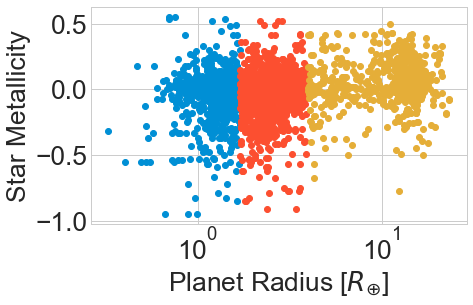

In [87]:
from astropy import constants as c

const=c.R_jup/c.R_earth

df['pl_radE']=df['pl_radj'].apply(lambda x: x*const)

large  = df.query('pl_radE > 4')
medium = df.query('1.7 < pl_radE < 3.9')
small  = df.query('pl_radE < 1.7')

for group in [small,medium,large]: 
    pl.plot(group['pl_radE'],group['st_metfe'],'o')
pl.ylabel('Star Metallicity')
pl.xlabel('Planet Radius [$R_{\oplus}$]')
pl.xscale('log')

Text(0,0.5,'Host star metallicity')

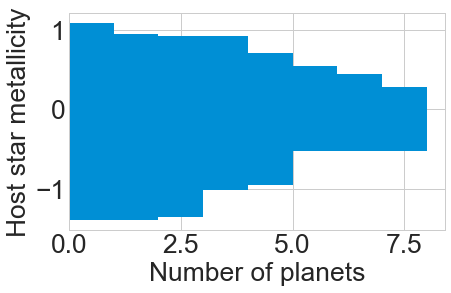

In [88]:
#stellar metallicity vs numer of planet, planet mass
cols = 'st_metfe,pl_pnum'.split(',')

df2=df[cols].dropna()
feh = df2['st_metfe']
pnum= df2['pl_pnum']

pl.barh(feh,pnum, align='center')#,color='green')
pl.xlabel('Number of planets')
pl.ylabel('Host star metallicity')

Text(0.5,0,'Host star metallicity')

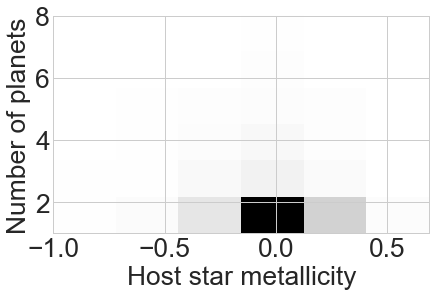

In [89]:
pl.hist2d(feh, pnum, bins=6);
pl.ylabel('Number of planets')
pl.xlabel('Host star metallicity')

Text(0.5,0,'Host star metallicity')

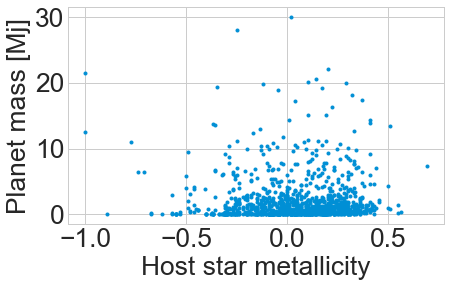

In [90]:
feh = df['st_metfe']
Mp= df['pl_bmassj']

pl.plot(feh,Mp,'.')
pl.ylabel('Planet mass [Mj]')
pl.xlabel('Host star metallicity')

## Planets around M dwarfs, with unknown masses (for IRD) 

In [91]:
#df.query("1.5 < pl_radj < 2") #only planets in fulton gap

#all planets around M dwarfs with unknown masses
len(df.query('st_teff < 3500')['pl_bmassj'])-len(df.query('st_teff < 3500')['pl_bmassj'].dropna())

25

In [92]:
#M dwarfs
df[~df['pl_bmassj'].notnull()].query('st_teff<3500')[['pl_hostname','pl_letter','pl_radj','pl_bmassj','st_teff','st_j']].sort_values(by='st_j')

,pl_hostname,pl_letter,pl_radj,pl_bmassj,st_teff,st_j
3552,K2-129,b,0.093,NaN,3459.09,9.697
881,K2-25,b,0.306,NaN,3180.00,11.303
3592,TRAPPIST-1,h,0.067,NaN,2559.00,11.354
2045,K2-72,e,0.115,NaN,3360.47,11.685
2044,K2-72,d,0.090,NaN,3360.47,11.685
2043,K2-72,c,0.103,NaN,3360.47,11.685
2042,K2-72,b,0.096,NaN,3360.47,11.685
2753,K2-28,b,0.207,NaN,3214.00,11.695
1575,Kepler-1308,b,0.046,NaN,3468.00,11.878
3525,K2-150,b,0.178,NaN,3499.00,12.107


In [93]:
from astropy import constants as c
const=c.R_jup/c.R_earth

fg=df[~df['pl_bmassj'].notnull()].query("0.0892 < pl_radj < 0.1338")
fg['pl_radE'] = fg['pl_radj'].apply(lambda x: x*const)
fg[['pl_hostname','pl_letter','pl_radE','pl_radj','pl_bmassj','st_teff','st_j']]\
    .sort_values(by='st_teff').head()#(by='st_j')

,pl_hostname,pl_letter,pl_radE,pl_radj,pl_bmassj,st_teff,st_j
3200,Kepler-445,d,1.2329878804032548,0.110,NaN,3157.0,13.542
3041,Kepler-1582,b,1.4907944372148445,0.133,NaN,3208.0,13.285
3502,Kepler-1649,b,1.0760621501701133,0.096,NaN,3240.0,13.379
3429,Kepler-1646,b,1.2329878804032548,0.110,NaN,3299.0,12.872
3201,Kepler-446,d,1.3450776877126416,0.120,NaN,3359.0,13.591


In summary, the most interesting planets around M dwarfs good for IRD follow-up is:
* TRAPPIST-1 bcdefgh
* K2-25 b, good
* K2-72 bcde, quite evolved
* K2-28 b, good
* K2-9 b, quite faint

## Fulton Gap
* Observational evidence for two distinct giant planet populations ([Fulton et al. 2017](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1705.06090))
![img](https://www.spaceanswers.com/wp-content/uploads/2017/06/FultonHistogram.jpg)

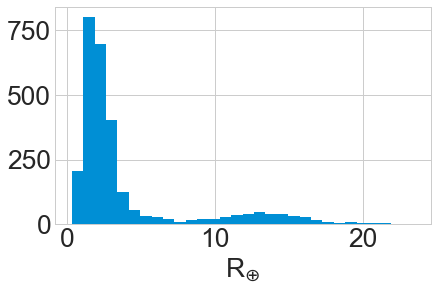

In [94]:
from astropy import constants as c
const=c.R_jup/c.R_earth

fig,ax = plt.subplots(1,1)
Rp_E = df.query('pl_discmethod == "Transit"')['pl_radj'].dropna().apply(lambda x: x*const.value)
pl.hist(Rp_E, bins=30);
plt.xlabel('R$_{\oplus}$');

## Surface gravity
With emphasis on HAT-P-44 b.

In [95]:
from transit_tools import surf_grav, scale_height, T_eq

* [Ballesteros and Luque](https://arxiv.org/pdf/1604.07725.pdf)

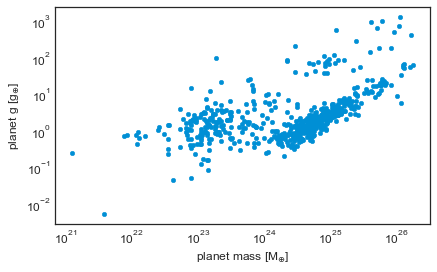

In [96]:
from astropy import constants as const
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-white')
M_J = const.M_jup #kg
R_J = const.R_jup #m
M_E = const.M_earth
R_E = const.R_earth
G=6.67408e-11 #m3 kg-1 s-2
g_E = G*M_E/R_E**2

fig=plt.figure(figsize=(5,5))
#convert to kg and m and then to Earth units
#GM/R**2

df['pl_bmassE'] = df['pl_bmassj']*M_E

Rp = df['pl_radj']*R_J
Mp = df['pl_bmassj']*M_J

#df['pl_g_E'] = surf_grav(Rp,Mp, g_earth=True)
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg

df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True)
#HAT-P-44 b
#plt.plot(hatp44b['pl_bmassE'],hatp44b['pl_g_E'], 'ro', ms=10)
plt.xlabel('planet mass [M$_{\oplus}$]')
plt.ylabel('planet g [g$_{\oplus}$]');

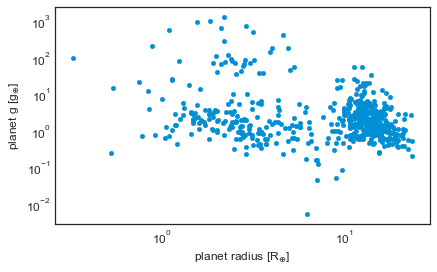

In [97]:
from astropy import constants as c
const=c.R_jup/c.R_earth

fig=pl.figure(figsize=(5,5))

df['pl_rade'] = df.query('pl_discmethod == "Transit"')['pl_radj'].dropna().apply(lambda x: x*const.value)
df.plot(x='pl_rade',y='pl_g_E', kind='scatter', loglog=True)
pl.xlabel('planet radius [R$_{\oplus}$]')
pl.ylabel('planet g [g$_{\oplus}$]');

## Amplitude of absorption due to atmosphere
* [Encrenaz+2014](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3982427/)

\begin{equation}
A=1.4\times 10^{-6}\frac{HR_p}{R^2_s}
A=
\end{equation}
This shows that the A signature is especially strong for planets having a high temperature (and thus being close to their stars), a large radius and a low molecular weight. Inflated hot Jupiters are thus privileged targets for primary transits.

$$
A\sim \frac{HR_p}{R^2_s} \sim 100 \; \rm{ppm} \\
\it H = \frac{k_BT}{\mu g}
$$

In [104]:
from astropy import units as u

def amp_atm(H,Rp,Rs):
    Rp_m = Rp*u.Rjup.to(u.m)
    Rs_m = Rs*u.Rsun.to(u.m)
    
    return H*Rp_m/Rs_m**2

In [105]:
Rp = df['pl_radj']
Rs = df['st_rad']
Mp = df['pl_bmassj']
rho = df['pl_dens']
Teq = df['pl_eqt']
g  = tt.surf_grav(Rp,Mp)
mu = 2.4

H = tt.scale_height(Teq, mu, g)

Text(0.5,0,'Planet density [g/cm^3]')

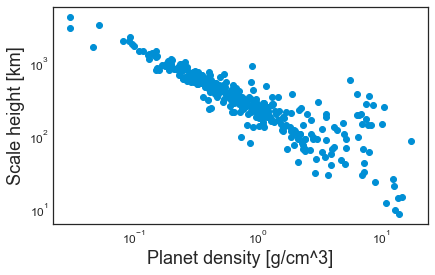

In [106]:
fontsize=18

pl.plot(rho,H/1e3,'o')
pl.xscale('log')
pl.yscale('log')
pl.ylabel('Scale height [km]',fontsize=fontsize)
pl.xlabel('Planet density [g/cm^3]',fontsize=fontsize)

In [ ]:
A = amp_atm(H,Rp,Rs)

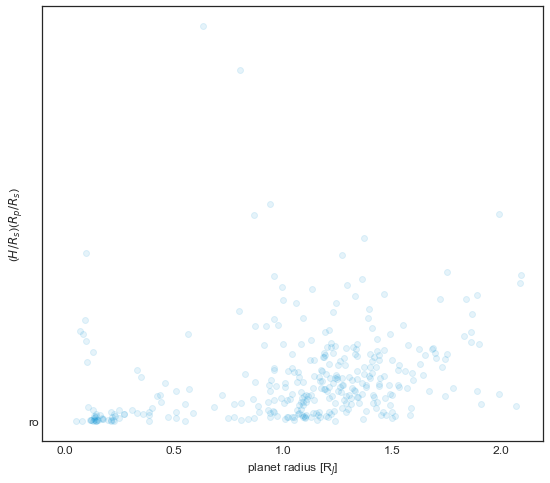

In [112]:
detections='GJ 1214,GJ 3470,HD 189733,WASP-6,WASP-12,WASP-19,WASP-29,WASP-31,\
            WASP-98,HAT-P-18,HAT-P-19,HAT-P-32'.split(',')

fig = pl.figure(figsize=(8,8))

pl.plot(Rp,A,'o','ro',alpha=0.1)
pl.xlabel('planet radius [R$_J$]')
pl.ylabel('($H/R_s$)($R_p/R_s$)');

## sensitivity of Rp/Rs measurements to atmospheric signatures

First, compute H/Rs

In [31]:
from astropy import units as u
import pandas as pd

Rs  = df['st_rad']

Rp  = df['pl_radj']
Mp  = df['pl_bmassj']
D   = df['pl_orbsmax']

g   = surf_grav(Rp, Mp)
df['grav'] =g

albedo = 0.3

df['Teq'] = T_eq(albedo, D)

#put estimate of Teq(a,D) if None
Teq = df.apply(lambda x: x['Teq'] if pd.isnull(x['pl_eqt']) else x['pl_eqt'], axis=1)

mu  = 2.3
H = scale_height(Teq, mu, g)

Rs_m = Rs.apply(lambda x: x*u.Rsun.to(u.m))
H_Rs = H/Rs_m
df['H_Rs'] = H_Rs

Text(0.5,1,'$T_{eq}$ [K]')

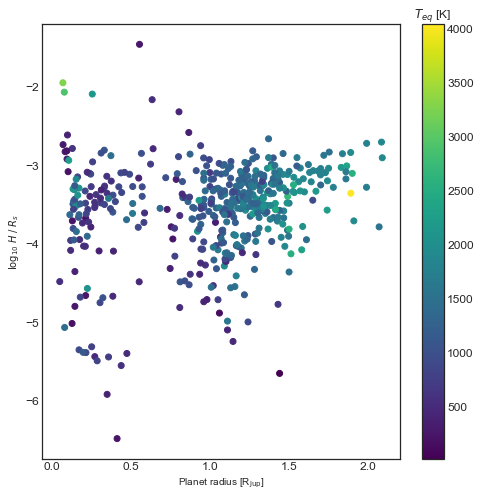

In [32]:
fig,ax=pl.subplots(figsize=(8,8))

sc=ax.scatter(Rp,np.log10(H_Rs),c=Teq,cmap='viridis')
ax.set_xlabel(r'Planet radius [R$_{\rm{Jup}}$]')
ax.set_ylabel(r'$\log_{10} \; H \; / \; R_s$')
cbar = pl.colorbar(sc) 
cbar.ax.set_title(r'$T_{eq}$ [K]')
#ax.set_yscale('log')

There is no apparent correlation in H/Rs and Teq of the planet.

In [33]:
df['H_Rs'] = H_Rs
df.query('H_Rs>0.0005').sort_values(by='H_Rs',ascending=False)#['pl_eqt']#['Teq']

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_j,st_h,st_k,pl_radE,pl_bmassE,pl_g_E,pl_rade,grav,Teq,H_Rs
2061,Kepler-453,b,Transit,2015,1,240.503000,0.79030,0.03590,89.443,0.00063,...,12.349,11.970,11.920,6.198566344209089,3.762590e+21,0.005211,6.198566,0.051063,286.277774,0.034900
271,KOI-55,b,Orbital Brightness Modulation,2011,2,0.240104,0.00600,NaN,65.000,0.00140,...,15.356,15.593,15.495,0.7622106897038303,8.361311e+21,0.765898,NaN,7.504569,3285.549365,0.011310
272,KOI-55,c,Orbital Brightness Modulation,2011,2,0.342887,0.00760,NaN,65.000,0.00210,...,15.356,15.593,15.495,0.8630915162822784,1.254197e+22,0.895980,NaN,8.779169,2919.287219,0.008590
637,GJ 1214,b,Transit,2009,1,1.580405,0.01411,NaN,88.170,0.01970,...,9.750,9.094,8.782,2.847081105658425,1.176556e+23,0.772430,2.847081,7.568579,2142.496470,0.008125
158,Kepler-51,b,Transit,2012,3,45.154000,0.25140,0.04000,NaN,0.00700,...,13.562,13.219,13.197,7.095284802684185,4.180655e+22,0.044193,7.095285,0.433018,507.575891,0.006893
159,Kepler-51,c,Transit,2012,3,85.312000,0.38400,0.01400,NaN,0.01300,...,13.562,13.219,13.197,9.00081152694376,7.764074e+22,0.051000,9.000812,0.499721,410.693671,0.004829
160,Kepler-51,d,Transit,2014,3,130.194000,0.50900,0.00800,NaN,0.02400,...,13.562,13.219,13.197,9.69576833226196,1.433368e+23,0.081141,9.695768,0.795050,356.717759,0.002634
327,TRAPPIST-1,b,Transit,2016,7,1.510871,0.01111,0.08100,89.650,0.00267,...,11.354,10.718,10.296,1.0872711309010519,1.594621e+22,0.717841,1.087271,7.033692,2414.496569,0.002449
3457,WASP-127,b,Transit,2016,1,4.178062,0.05200,NaN,88.700,0.18000,...,9.092,8.738,8.641,15.356303601385994,1.075026e+24,0.242601,15.356304,2.377097,1116.045627,0.002189
3309,HAT-P-67,b,Transit,2017,1,4.810103,0.06505,0.00000,88.800,0.34000,...,9.145,8.961,8.900,23.370724824007148,2.030604e+24,0.197846,23.370725,1.938574,997.837845,0.001989


Note that only Kepler-51 has published value for its planet's Teq so the results for the others using estimated Teq(a,D) might be erroneous.

Fukui+2016a achieved a five-minute binned photometric precisions of 0.028%, 0.022%, and 0.024% in the g,r,and z-bands which provided the highest-quality photometric data for this planet.

In [34]:
df.query('pl_hostname == "HAT-P-14"')['H_Rs']*100

728    0.013191
Name: H_Rs, dtype: float64

In [35]:
df.query('pl_hostname == "HAT-P-14"')['H_Rs']*100/0.028

728    0.471115
Name: H_Rs, dtype: float64

Even for HAT-P-14, an order of magnitude rms or photometric precision is needed to match H/Rs.

## Rayleigh scattering signature detections

## H vs. Rp/Rs

TypeError: surf_grav() got an unexpected keyword argument 'g_earth'

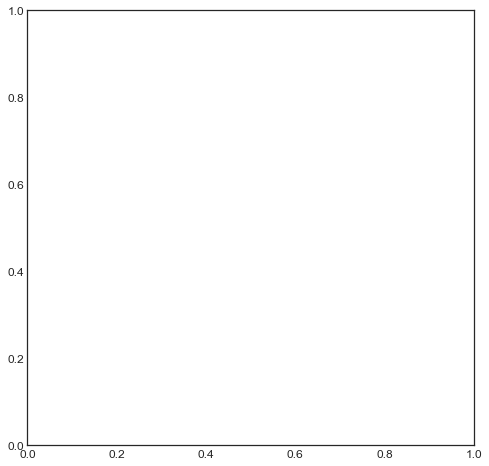

In [36]:
detections='GJ 1214,GJ 3470,HD 189733,WASP-6,WASP-12,WASP-19,WASP-29,WASP-31,WASP-98,HAT-P-18,HAT-P-19,HAT-P-32'.split(',')

fig,ax=pl.subplots(figsize=(8,8))

Rs  = df['st_rad']
Rp  = df['pl_radj']
Mp  = df['pl_bmassj']
D   = df['pl_orbsmax']

g   = surf_grav(Rp, Mp, g_earth=False)
albedo = 0.3

df['Teq'] = T_eq(albedo, D)

estimate_T = False
if estimate_T:
    #put estimate of Teq(a,D) if None
    Teq = df.apply(lambda x: x['Teq'] if pd.isnull(x['pl_eqt']) else x['pl_eqt'], axis=1)
else:
    Teq = df['pl_eqt']
    
mu  = 2.3
H = scale_height(Teq, mu, g)/1e3
df['H'] = H

Rs_m = Rs.apply(lambda x: x*u.Rsun.to(u.m))
H_Rs = H/Rs_m  

Rp_Rs = df['pl_radj']*u.Rjupiter.to(u.Rsun)/df['st_rad']

sc=ax.scatter(Rp_Rs,np.log10(H),c=Teq,cmap='RdBu')
cbar = pl.colorbar(sc) 
cbar.ax.set_title(r'$T_{eq}$ [K]')
#ax.set_yscale('log')    
ax.set_xlabel(r'$R_p/R_s$')
ax.set_ylabel(r'$\log_{10} \; H$ [km]')
ax.set_xlim([0,0.2])

(0, 0.2)

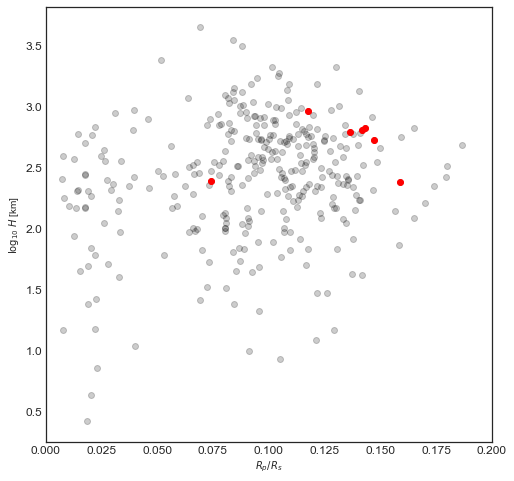

In [39]:
detections='GJ 1214,GJ 3470,HD 189733,WASP-6,WASP-12,WASP-19,WASP-29,WASP-31,WASP-98,HAT-P-18,HAT-P-19,HAT-P-32'.split(',')

fig,ax=pl.subplots(figsize=(8,8))

Rs  = df['st_rad']
Rp  = df['pl_radj']
Mp  = df['pl_bmassj']
D   = df['pl_orbsmax']

g   = surf_grav(Rp, Mp)
albedo = 0.3

df['Teq'] = T_eq(albedo, D)

estimate_T = False
if estimate_T:
    #put estimate of Teq(a,D) if None
    Teq = df.apply(lambda x: x['Teq'] if pd.isnull(x['pl_eqt']) else x['pl_eqt'], axis=1)
else:
    Teq = df['pl_eqt']
    
mu  = 2.3
H = scale_height(Teq, mu, g)/1e3
df['H'] = H

Rs_m = Rs.apply(lambda x: x*u.Rsun.to(u.m))
H_Rs = H/Rs_m  

Rp_Rs = df['pl_radj']*u.Rjupiter.to(u.Rsun)/df['st_rad']

sc=ax.plot(Rp_Rs,np.log10(H),'ok',alpha=0.2)
#ax.set_yscale('log')

for i in detections:
    d=df.query('pl_hostname == @i')
    #print(i)
    rp_rs = d['pl_radj']*u.Rjupiter.to(u.Rsun)/d['st_rad']
    h = d['H']
    #t  = d['pl_eqt']
    ax.plot(rp_rs,np.log10(h),'or')
    
ax.set_xlabel(r'$R_p/R_s$',fontsize=fontsize)
ax.set_ylabel(r'$\log_{10} \; H$ [km]',fontsize=fontsize)
ax.set_xlim([0,0.2])

## Scale height of TRAPPIST-1 planets

In [38]:
p=df.query('pl_hostname == "TRAPPIST-1" and pl_letter == "g"')
p

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_j,st_h,st_k,pl_radE,pl_bmassE,pl_g_E,pl_rade,grav,Teq,H_Rs
3591,TRAPPIST-1,g,Transit,2017,7,12.35294,0.0451,0.061,89.71,0.00422,...,11.354,10.718,10.296,1.1321070538248066,2.520338e+22,1.046478,1.132107,10.25381,1198.382204,0.000836


In [41]:
Mp   = p['pl_bmassj'].values[0]
Rp   = p['pl_radj'].values[0]
a_au = p['pl_orbsmax'].values[0]

#assumption
albedo = 0.2

Teq = T_eq(albedo, df['pl_orbsmax'].values[0])
df['Teq'] = Teq

g   = surf_grav(Rp,Mp)


#assuming we know mu
mu  = 2.3
H_theo   = scale_height(Teq, mu, g)
print('scale height:\t{:.2f} km'.format(H_theo/1e3))

scale height:	nan km


In [42]:
mu  = 2.3

Mp   = df['pl_bmassj'].values
Rp   = df['pl_radj'].values
Teq  = df['pl_eqt'].values #df['Teq']

#g   = df['pl_g_E]
#g   = surf_grav(Rp,Mp, g_earth=False)
g   = df['grav']
  
df['H']   = scale_height(Teq, mu, g)/1e3

In [43]:
("pl_eqt" and "pl_insol") in df.columns

True

Check if getting reasonable scale height (km).

In [44]:
df.query('pl_hostname == "TRAPPIST-1"')[['pl_letter','H','grav','pl_eqt']]

,pl_letter,H,grav,pl_eqt
327,b,204.416271,7.033692,400.0
328,c,100.975345,12.174456,342.0
329,d,154.143147,6.715944,288.0
3589,e,125.513395,7.188238,251.0
3590,f,128.356983,6.132865,219.0
3591,g,69.760026,10.253810,199.0
3592,h,NaN,NaN,173.0


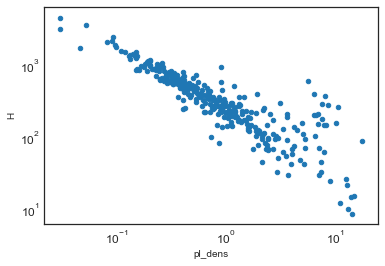

In [45]:
df.plot(x='pl_dens',y='H', kind='scatter', loglog=True)

Note that there is a big difference in resulting scale height between using calculated and available equlibrirum temperature.

In [46]:
df[['pl_hostname','pl_eqt','Teq']].dropna().head()

,pl_hostname,pl_eqt,Teq


Difference in estimated Teq and that available in literature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f6719e320>,
      dtype=object)

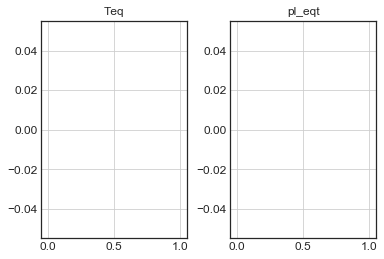

In [47]:
df[['Teq','pl_eqt']].dropna().apply(lambda x: x['Teq']-x['pl_eqt'], axis=1).hist(bins=50)

In [48]:
cols='pl_hostname pl_letter ra dec pl_radj pl_bmassj pl_g_E pl_bmassE'.split()
df_g = df[cols].dropna()
extended_cols = np.concatenate((cols,
            ['H','pl_trandep','pl_eqt','pl_insol','st_optmag','st_teff']),axis=0)

df_g =df.iloc[df_g.index][extended_cols]
df_g.head()

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
47,HAT-P-36,b,188.266255,44.915352,1.264,1.832,2.900626,1.094137e+25,230.557158,NaN,1823.0,NaN,12.262,5560.0
48,HAT-P-37,b,284.296064,51.269138,1.178,1.169,2.131005,6.981694e+24,218.798774,1.899,1271.0,NaN,13.230,5500.0
49,HAT-P-38,b,35.383234,32.246151,0.825,0.267,0.992348,1.594621e+24,399.988182,NaN,1082.0,NaN,12.557,5330.0
50,Kepler-16,b,289.075710,51.757439,0.754,0.333,1.481706,1.988797e+24,NaN,NaN,NaN,NaN,11.762,4450.0
51,Kepler-17,b,298.395274,47.815006,1.310,2.450,3.611470,1.463229e+25,159.477501,NaN,1570.0,NaN,14.141,5781.0


* Stevenson (2016) found a higher cloud prominence for the more temperate (equilibrium temperature Teq < 700 K) and lower surface gravity planets (log g < 2.8), based on the strength of the 1.4 $\mu$m H$_2$O band. 
* Heng (2016) found a tentative lower cloudiness index for the more irradiated atmospheres, based on the alkali absorption line profiles. 
* Lastly, Barstow et al. (2017) found evidence of aerosol absorption in all 10 planets from Sing et al. (2016). 
* Overall, finding that planets with 1300 K < Teq < 1700 K, are more consistent with gray cloud layers, whereas other planets are more consistent with strong Rayleigh scattering absorption.

### Large scale heights

[scale height](https://en.wikipedia.org/wiki/Scale_height)

In [49]:
import transit_tools as tt

hostname = "KELT-18"
kelt18 = tt.query(hostname)
#kelt18['H']

However, according to [McLeod 2017](http://exoplanet.eu/catalog/kelt-18_b/), it has an estimated H=600 km!

In [50]:
def T_eq(a, D, da=0, dD=0):
    '''
    a    : albedo [0,1]
    D    : semi-major axis in au
    see http://burro.case.edu/Academics/Astr221/SolarSys/equiltemp.html
    '''
    Tsol = 5770 #K 
    Rsol = 6.957e8 #m
    au   = 1.4959787e11 #m
    Tp = Tsol*(1-a)**0.25*np.sqrt(Rsol/(2*D*au))
    return Tp

def scale_height(Teq, mu, g):
    '''
    T_eq: planet's equilibrium temperature
    mu:   average mass of an atmospheric particle (in units of a H-atom mass)
    g:    planet's surface gravity
    
    returns: atmospheric scale height in unit of meter
    
    atmospheric scale height is estimated using the planet-specific
    equilibrium temperature and assuming a H/He atmosphere with a mean 
    molecular weight mu = 2.3 amu. (Sing+2016)
    
    See also http://astro.unl.edu/naap/scaleheight/sh_bg1.html
    
    For Earth,
    mu=(0.21)(32)+(0.78)(28)+(0.01)(40) = 29 
    by weighting its composition of oxygen, nitrogen, and argon
    
    For mu values of exoplanets, see Table 2 in Tessenyi 2013:
    https://arxiv.org/pdf/1308.4986.pdf
    '''     
    #R  = 8.3144598 #J/K/mol
    k_B= 1.38e-23   #J/K
    mH = 1.67e-26   #mass of H in kg 
    
    return k_B*Teq/(mu*mH*g)

In [51]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

albedos = np.arange(0.1,0.6,0.1)
mus     = np.arange(2.3,3.0,0.01)
temps   = []
#at a given albedo, with varying mu
H_theo = {}

Teq  = kelt18['pl_eqt'].values
Rp   = kelt18['pl_radj'].values
Mp   = kelt18['pl_bmassj'].values
a_au = kelt18['pl_orbsmax'].values
logg = 3.073
g    = 10**(logg)/100
#g   = surf_grav(Rp, Mp, g_earth=False)
g

11.830415557251648

In [52]:
#print('mu, albedo, scale height (km)')
for albedo in albedos:
    T = tt.T_eq(albedo, a_au)[0]
    temps.append(T)
    
    scale_heights = []
    for mu in mus:
        H = tt.scale_height(T, mu, g)/1e3 #km
        scale_heights.append(H)
        #print('{:.1f}\t{:.1f}\t{:.2f}'.format(mu,albedo,H/1e3))
    H_theo[albedo] = scale_heights

Text(0.5,1,'KELT-18b')

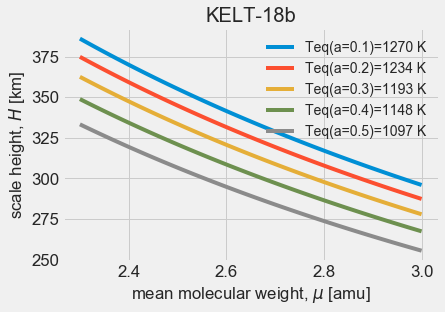

In [53]:
pl.style.use('fivethirtyeight')

for a,T in zip(albedos,temps):
    pl.plot(mus,H_theo[a],label='Teq(a={:.1f})={:.0f} K'.format(a,T))
    pl.xlabel('mean molecular weight, $\mu$ [amu]')
    pl.ylabel('scale height, $H$ [km]');
pl.legend()
pl.title('KELT-18b')

The reported Teq=2000 K cannot be accounted by changing albedo as shown above.

## H/Rs

In [54]:
T=kelt18['pl_eqt'].values[0]
H=scale_height(T, mu, g)
print('H={:.3f} km'.format(H/1e3))

H=48.545 km


In [55]:
import astropy.units as u

Rs=kelt18['st_rad'].values[0]*u.Rsun.to(u.m)
print('Required precision: {:.2f}%'.format((H/Rs)*100))

Required precision: 0.00%


In [56]:
df.query('pl_hostname=="KELT-18"')['H_Rs']

3503    0.000475
Name: H_Rs, dtype: float64

The difference arises in computed value of g which is difference from the published value (g=1.03).

## good targets

* WASP-107
* HAT-P-12
* WASP-139b
* HAT-P-26
* WASP-131b is a bloated Saturn-mass planet (0.27 MJup and 1.22 RJup). Its large scaleheight and bright host star make it a good target for atmospheric characterization

## sorted targets

In [58]:
df_g_sorted = df_g.query('pl_radj < 2 and st_optmag < 15 and pl_eqt < 1000 and pl_g_E < 1 and H>10') \
        .sort_values(by='st_optmag')#by='pl_g_E') #\
        #.plot(x='pl_radj',y='pl_g_E', kind='scatter')#, loglog=True)
df_g_sorted

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
2011,WASP-69,b,315.025778,-5.094404,1.057,0.26000,0.588686,1.552815e+24,600.103524,1.786,963.0,NaN,9.870,4715.0
3575,WASP-107,b,188.386871,-10.146149,0.940,0.12000,0.343547,7.166838e+23,822.220782,2.170,770.0,NaN,11.471,4430.0
57,Kepler-36,c,291.250191,49.231827,0.328,0.02500,0.587831,1.493091e+23,579.133807,NaN,928.0,NaN,11.866,5911.0
3286,EPIC 220674823,c,13.079780,10.794699,0.247,0.01793,0.743442,1.070845e+23,356.265754,NaN,722.0,64.0,12.102,5496.0
3042,KOI-94,d,297.333057,41.891117,1.005,0.33400,0.836517,1.994770e+24,353.463002,NaN,806.0,NaN,12.205,6182.0
371,KOI-94,e,297.333057,41.891117,0.585,0.11000,0.813095,6.569601e+23,263.484552,NaN,584.0,NaN,12.205,6182.0
2757,K2-32,d,252.426086,-19.542822,0.306,0.03241,0.875582,1.935643e+23,224.989044,NaN,537.0,14.5,12.310,5275.0
2756,K2-32,b,252.426086,-19.542822,0.458,0.05191,0.626009,3.100255e+23,478.768145,NaN,817.0,77.7,12.310,5275.0
2321,GJ 3470,b,119.774349,15.391492,0.346,0.04300,0.908608,2.568117e+23,243.861895,NaN,604.0,NaN,12.330,3652.0
3446,WASP-139,b,49.562229,-41.302147,0.800,0.11700,0.462452,6.987667e+23,721.869625,1.070,910.0,NaN,12.400,5310.0


In [59]:
from adjustText import adjust_text

fig = pl.figure(figsize=(10,10))

cols = 'pl_hostname,pl_letter,pl_radj,pl_bmassj,pl_radjerr1,pl_radjerr2,pl_bmassjerr1,pl_bmassjerr2'.split(',')
rm = imaging[cols].dropna()

r = rm['pl_radj'].values
m = rm['pl_bmassj'].values
r_err = [rm['pl_radjerr1'].values, rm['pl_radjerr2'].values]
m_err = [rm['pl_bmassjerr1'].values, rm['pl_bmassjerr2'].values]

#pl.errorbar(r,m,xerr=r_err,yerr=m_err, fmt='--o',capthick=2)
pl.scatter(r,m)

names   = rm['pl_hostname'].values
letters = rm['pl_letter'].values

#add names
texts=[]
for x,y,n,l in zip(r,m,names,letters):
    text='{} {}'.format(n,l)
    texts.append(pl.text(x,y,text,color='k'))
    
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="->",
                                                    color='k', alpha=0.5))

pl.xlabel('Planet radius [R$_{Jup}$]')
pl.ylabel('Planet mass [M$_{Jup}$]')

NameError: name 'imaging' is not defined

In [60]:
df.query('st_optmag<10 and st_rad < 1 and pl_discmethod == "Transit" and pl_trandep>0.8')

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_h,st_k,pl_radE,pl_bmassE,pl_g_E,pl_rade,grav,Teq,H_Rs,H
1897,WASP-8,b,Transit,2010,2,8.158715,0.08010,0.31,88.55,2.244,...,8.218,8.086,11.63492199871435,1.340199e+25,5.268520,11.634922,51.623055,NaN,0.000096,NaN
2011,WASP-69,b,Transit,2014,1,3.868138,0.04525,0.00,86.71,0.260,...,7.543,7.459,11.847892632602186,1.552815e+24,0.588686,11.847893,5.768182,NaN,0.001065,600.103524


In [61]:
df_g.query('H>10 and pl_trandep>1 and pl_eqt<1000')

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
140,HATS-6,b,88.146797,-19.031656,0.998,0.319,0.810196,1.905184e+24,322.836918,3.23000,713.0,NaN,15.160,3724.0
726,HAT-P-12,b,209.389489,43.493534,0.959,0.211,0.580371,1.260169e+24,608.701412,1.97700,963.0,NaN,12.840,4650.0
823,CoRoT-10,b,291.063708,0.746143,0.970,2.750,7.393493,1.642400e+25,29.770442,1.61036,600.0,NaN,15.220,5075.0
1677,WASP-59,b,349.623126,24.889290,0.775,0.863,3.634694,5.154151e+24,67.622415,1.69000,670.0,NaN,13.000,4650.0
2011,WASP-69,b,315.025778,-5.094404,1.057,0.260,0.588686,1.552815e+24,600.103524,1.78600,963.0,NaN,9.870,4715.0
2106,WASP-80,b,303.167407,-2.144208,0.999,0.538,1.363678,3.213132e+24,221.935059,2.93700,825.0,NaN,11.870,4143.0
3284,WASP-84,b,131.107099,1.860033,0.942,0.694,1.978418,4.144821e+24,147.782810,1.67800,797.0,NaN,10.830,5314.0
3445,WASP-132,b,217.609131,-46.159180,0.870,0.410,1.370269,2.448670e+24,204.268994,1.46000,763.0,NaN,12.400,4775.0
3446,WASP-139,b,49.562229,-41.302147,0.800,0.117,0.462452,6.987667e+23,721.869625,1.07000,910.0,NaN,12.400,5310.0
3574,WASP-105,b,24.167667,-50.659027,0.960,1.800,4.940723,1.075026e+25,66.824502,1.20000,900.0,NaN,12.100,5070.0


In [62]:
df_g_sorted

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
2011,WASP-69,b,315.025778,-5.094404,1.057,0.26000,0.588686,1.552815e+24,600.103524,1.786,963.0,NaN,9.870,4715.0
3575,WASP-107,b,188.386871,-10.146149,0.940,0.12000,0.343547,7.166838e+23,822.220782,2.170,770.0,NaN,11.471,4430.0
57,Kepler-36,c,291.250191,49.231827,0.328,0.02500,0.587831,1.493091e+23,579.133807,NaN,928.0,NaN,11.866,5911.0
3286,EPIC 220674823,c,13.079780,10.794699,0.247,0.01793,0.743442,1.070845e+23,356.265754,NaN,722.0,64.0,12.102,5496.0
3042,KOI-94,d,297.333057,41.891117,1.005,0.33400,0.836517,1.994770e+24,353.463002,NaN,806.0,NaN,12.205,6182.0
371,KOI-94,e,297.333057,41.891117,0.585,0.11000,0.813095,6.569601e+23,263.484552,NaN,584.0,NaN,12.205,6182.0
2757,K2-32,d,252.426086,-19.542822,0.306,0.03241,0.875582,1.935643e+23,224.989044,NaN,537.0,14.5,12.310,5275.0
2756,K2-32,b,252.426086,-19.542822,0.458,0.05191,0.626009,3.100255e+23,478.768145,NaN,817.0,77.7,12.310,5275.0
2321,GJ 3470,b,119.774349,15.391492,0.346,0.04300,0.908608,2.568117e+23,243.861895,NaN,604.0,NaN,12.330,3652.0
3446,WASP-139,b,49.562229,-41.302147,0.800,0.11700,0.462452,6.987667e+23,721.869625,1.070,910.0,NaN,12.400,5310.0


In [63]:
df_g.query('pl_radj < 1 and st_optmag < 13').shape

(119, 14)

In [64]:
df_g_sorted.to_csv('muscat_dec_run_names.csv',columns=['pl_hostname'],index=False)

In [65]:
df_g_sorted.head()

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
2011,WASP-69,b,315.025778,-5.094404,1.057,0.26000,0.588686,1.552815e+24,600.103524,1.786,963.0,NaN,9.870,4715.0
3575,WASP-107,b,188.386871,-10.146149,0.940,0.12000,0.343547,7.166838e+23,822.220782,2.170,770.0,NaN,11.471,4430.0
57,Kepler-36,c,291.250191,49.231827,0.328,0.02500,0.587831,1.493091e+23,579.133807,NaN,928.0,NaN,11.866,5911.0
3286,EPIC 220674823,c,13.079780,10.794699,0.247,0.01793,0.743442,1.070845e+23,356.265754,NaN,722.0,64.0,12.102,5496.0
3042,KOI-94,d,297.333057,41.891117,1.005,0.33400,0.836517,1.994770e+24,353.463002,NaN,806.0,NaN,12.205,6182.0


In [66]:
df_g_dwarf = df_g.query('pl_radj < 1 and st_optmag < 13 and st_teff < 4200') \
        .sort_values(by='st_optmag')#by='pl_g_E') #\
        #.plot(x='pl_radj',y='pl_g_E', kind='scatter')#, loglog=True)
df_g_dwarf

,pl_hostname,pl_letter,ra,dec,pl_radj,pl_bmassj,pl_g_E,pl_bmassE,H,pl_trandep,pl_eqt,pl_insol,st_optmag,st_teff
2106,WASP-80,b,303.167407,-2.144208,0.999,0.53800,1.363678,3.213132e+24,221.935059,2.937,825.0,NaN,11.870,4143.0
2321,GJ 3470,b,119.774349,15.391492,0.346,0.04300,0.908608,2.568117e+23,243.861895,NaN,604.0,NaN,12.330,3652.0
1047,Kepler-138,d,290.381547,43.292973,0.108,0.00201,0.435922,1.200445e+22,NaN,NaN,NaN,2.32,12.925,3841.0
2138,Kepler-138,b,290.381547,43.292973,0.047,0.00021,0.240483,1.254197e+21,NaN,NaN,NaN,6.81,12.925,3841.0
2454,Kepler-138,c,290.381547,43.292973,0.107,0.00620,1.369887,3.702866e+22,NaN,NaN,NaN,4.63,12.925,3841.0


Text(0,0.5,'planet g [g$_{\\oplus}$]')

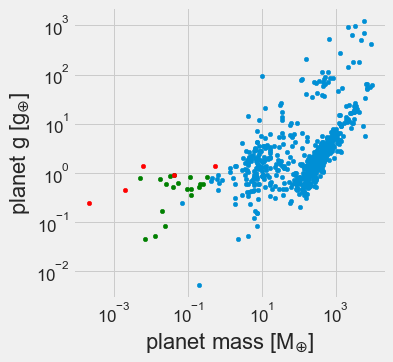

In [67]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
#convert to kg and m and then to Earth units
#GM/R**2
df['pl_bmass']=df['pl_bmassj']*M_J
df['pl_bmassE']=df['pl_bmassj']*M_J/M_E
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True,ax=ax)

#sub-Jupiters
df_g_sorted.plot(x='pl_bmassj',y='pl_g_E', kind='scatter', loglog=True,color='g',ax=ax)
#planet around dwarf host stars
df_g_dwarf.plot(x='pl_bmassj',y='pl_g_E', kind='scatter', loglog=True,color='r',ax=ax)
plt.xlabel('planet mass [M$_{\oplus}$]',fontsize=22)
plt.ylabel('planet g [g$_{\oplus}$]',fontsize=22)

In [68]:
hatp44b = df.query('pl_hostname == "HAT-P-44" and pl_letter == "b"')
hatp44b

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_k,pl_radE,pl_bmassE,pl_g_E,pl_rade,grav,Teq,H_Rs,H,pl_bmass
132,HAT-P-44,b,Transit,2014,2,4.301219,0.0507,0.044,89.1,0.352,...,11.275,13.921554067825841,111.875599,0.577245,13.921554,5.656073,NaN,0.001065,704.147354,6.681619e+26


In [69]:
pl.style.use('seaborn-whitegrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize = 16

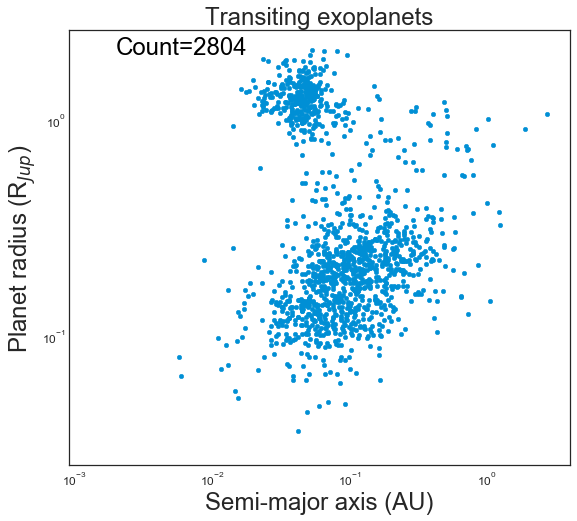

In [113]:


fig,ax=plt.subplots(1,1,figsize=(8,8))
sample = df[df['pl_discmethod'] == 'Transit']
#HAT-P-44 b
sample.plot(x='pl_orbsmax',y='pl_radj',kind='scatter',ax=ax)
#sample.plot(x='pl_orbsmax',y='pl_radj',kind='kde',ax=ax, ylim=(1e-2,1e2))
#ax.plot(hatp44b['pl_orbsmax'],hatp44b['pl_radj'], 'ro', ms=10)

fontsize=24

count=len(sample)
pl.text(2e-3,2,'Count={}'.format(count),fontsize=fontsize,color='k',alpha=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)',fontsize=fontsize)
ax.set_ylabel('Planet radius (R$_{Jup}$)',fontsize=fontsize)
ax.set_title('Transiting exoplanets',fontsize=fontsize)

fig.savefig(figloc+'/statistics_a_vs_R.png',bbox_inches='tight')

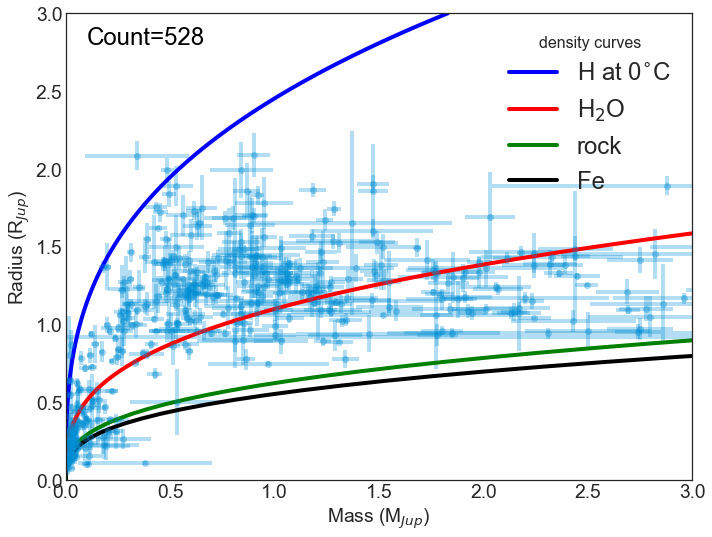

In [71]:
pl.style.use('seaborn-white')
import numpy as np

mass_h2O, mass_Fe, mass_rock, mass_H = [],[],[],[]#,[], []

rho_h2O, rho_Fe, rho_rock, rho_H= 1000, 7874, 5510, 89.88#, 11340, 21450 #kg/m3
Mjup,Rjup=1.898e27,6.9911e7

#6.e24, /(R_Earth*1000)

#filter those with uncertainty only
cols='pl_bmassjerr1,pl_bmassjerr2,pl_radjerr1,pl_radjerr2'.split(',')
mr = df.iloc[df[cols].dropna().index]

#rad = mr['pl_radj'].sort_values()
rad = np.linspace(0,3,100)
for r in rad*Rjup:
    mass_h2O.append(4./3.*np.pi*rho_h2O*(r)**3) #kg
    mass_Fe.append(4./3.*np.pi*rho_Fe*(r)**3) #kg
    mass_rock.append(4./3.*np.pi*rho_rock*(r)**3) #kg
    mass_H.append(4./3.*np.pi*rho_H*(r)**3) #kg
    #mass_lead.append(4./3.*np.pi*rho_lead*(r)**3) #kg
    #mass_iridium.append(4./3.*np.pi*rho_iridium*(r)**3) #kg

count=len(mr.query('pl_radj > 0 and pl_bmassj > 0'))

fig, ax1 = plt.subplots(1,1,figsize=(10,8))
errbar = ax1.errorbar(x=mr['pl_bmassj'], y=mr['pl_radj'], 
             xerr=mr['pl_bmassjerr1'], yerr=mr['pl_radjerr1'],
             fmt='o', alpha=0.3, label=None)#'Count={}'.format(count))

pl.text(0.1,2.8,'Count={}'.format(count),fontsize=24,color='k',alpha=1)
#plt.xlim([0,13])
#plt.ylim([0,3])

masses=[mass_H,mass_h2O,mass_rock,mass_Fe]
labels = ['H at 0$^{\circ}$C','H$_2$O','rock','Fe']#,'Lead','Iridium']
colors=['b-','r-','g-','k-']#,'c-','m-']

for m,c,label in zip(masses,colors,labels):
     ax1.plot(np.array(m)/Mjup, rad, c,label=label)
#with HAT-P-44b
#hatp44b = df.query('pl_hostname == "HAT-P-44" and pl_letter == "b"')
#ax1.plot(hatp44b['pl_bmassj'],hatp44b['pl_radj'], 'ro', ms=10,label='HAT-P 44 b')
ax1.set_xlim([0,3])
ax1.set_ylim([0,3])
ax1.set_xlabel('Mass (M$_{Jup}$)')
ax1.set_ylabel('Radius (R$_{Jup}$)')
ax1.legend(title='density curves', fontsize=24)

fig.savefig(figloc+'/statistics_density.png',bbox_inches='tight')

Text(0.5,1,'Transiting exoplanets')

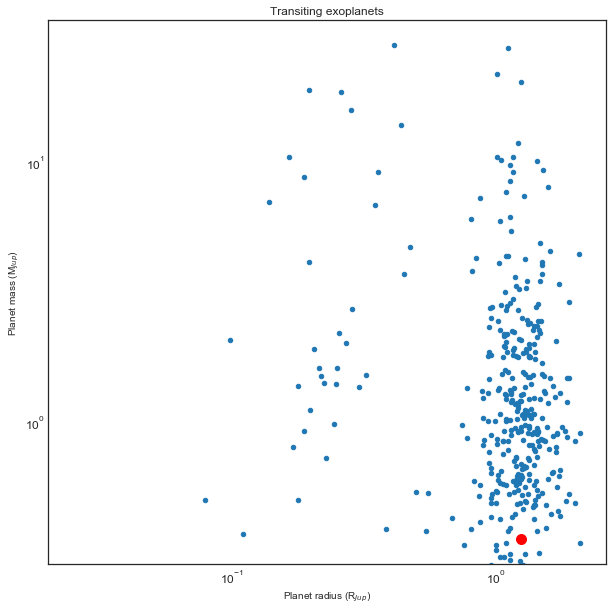

In [43]:
plt.style.use('seaborn-white')
fig,ax=plt.subplots(1,1,figsize=(10,10))
sample = df[df['pl_discmethod'] == 'Transit']
#HAT-P-44 b
sample.plot(x='pl_radj',y='pl_bmassj',kind='scatter',ax=ax)
#sample.plot(x='pl_orbsmax',y='pl_radj',kind='kde',ax=ax, ylim=(1e-2,1e2))
ax.plot(hatp44b['pl_radj'],hatp44b['pl_bmassj'], 'ro', ms=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Planet mass (M$_{Jup}$)')
ax.set_xlabel('Planet radius (R$_{Jup}$)')
ax.set_title('Transiting exoplanets')

Add [(surface) gravity](https://en.wikipedia.org/wiki/Surface_gravity) of solar system bodies from this [wiki page](https://en.wikipedia.org/wiki/List_of_Solar_System_objects_by_size).

`!pip install wikipedia
import wikipedia
w = wikipedia.page("List_of_Solar_System_objects_by_size")`

Text(0,0.5,'planet g [g$_{\\oplus}$]')

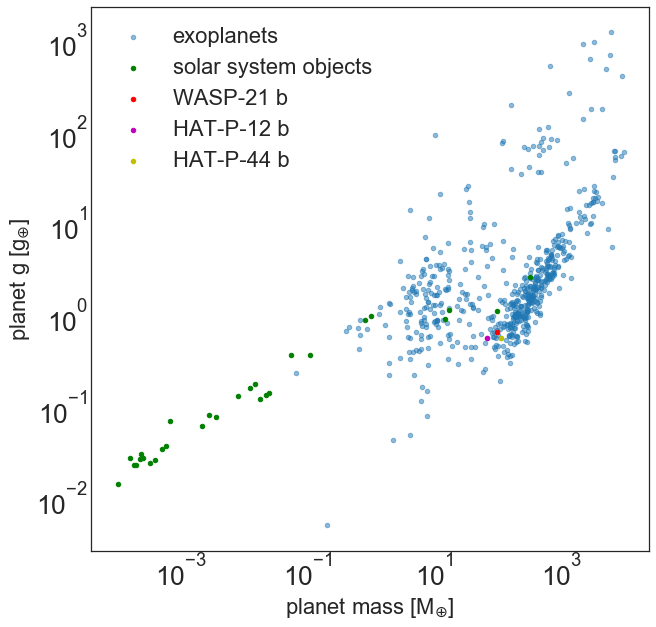

In [44]:
plt.rcParams.update({'font.size': 22})

names='Jupiter,Saturn,Uranus,Neptune,Earth,Venus,Mars,Ganymede,Titan,Mercury,Callisto,Io,Moon,Europa,Triton,Pluto,Eris,Titania,Rhea,Oberon,Iapetus,Haumea,Charon,Umbriel,Ariel,Dione,Quaoar,Tethys,Ceres'.split(',')
#km
radii=[69911, 58232, 25362, 24622, 6371, 6051.8, 3389.5, 2634.1, 2576, 2439.7, 2410.3, 1821.6, 1737.1, 1560.8, 1353.4, 1186, 1163, 788.4, 763.8, 761.4, 734.5, 620, 606, 584.7, 578.9, 561.4, 555, 531.1, 473]
# x 1e21 kg
masses=[1898600, 568460, 86832, 102430, 5973.6, 4868.5, 641.85, 148.2, 134.5, 330.2, 107.6, 89.3, 73.5, 48, 21.5, 13.105, 16.7, 3.526, 2.3166, 3.014, 1.9739, 4.006, 1.52, 1.2, 1.35, 1.096, 1.4, 0.6173, 0.939]

df_ss=pd.DataFrame({'name': names, 'mass': masses, 'radius': radii})
df_ss['massE']=df_ss['mass']*1e21/M_E
df_ss['g_E']=G/g_E*df_ss['mass']*1e21/(df_ss['radius']*1e3)**2

fig, ax = plt.subplots(1,1, figsize=(10,10))
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
        ax=ax, alpha=0.5, label='exoplanets')
df_ss.plot(x='massE',y='g_E', kind='scatter', loglog=True, 
           color='g', ax=ax, label='solar system objects')

### low-surf log g
sample=["WASP-21","HAT-P-12","HAT-P-44"]
colors='r m y'.split()
for i,c in zip(sample, colors):
    p=df.query('pl_hostname == "{}"'.format(i))
    l = '{} b'.format(i)
    p.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
           color=c, label=l, ax=ax)
#     if len(p['pl_letter']) > 1:
#         n='{0} {1}'.format(p['pl_hostname'].values[0], p['pl_letter'].values[0])
#         ax.text(p['pl_bmassj'].values[0], p['pl_g'].values[0], n)#, color='r')
plt.xlabel('planet mass [M$_{\oplus}$]')
plt.ylabel('planet g [g$_{\oplus}$]')

In [45]:
#from sklearn.linear_model import LinearRegression

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_ss['massE'],df_ss['g_E'])

print('slope\t\t={0}\nintercept\t={1}\nr-value\t\t={2}\np-value\t\t={3}\nstandard error\t={4}' \
      .format(slope, intercept, r_value, p_value, std_err))

slope		=0.008004149493005075
intercept	=0.22217278150593692
r-value		=0.8457469552981565
p-value		=7.65058579343508e-09
standard error	=0.0009718423471475612


In [46]:
import statsmodels.formula.api as sm
result = sm.ols(formula="pl_bmassE ~ pl_g_E", data=df).fit()
print(result.params)

Intercept    461.294300
pl_g_E         5.189491
dtype: float64


In [85]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              pl_bmassE   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     117.6
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           5.09e-25
Time:                        14:12:53   Log-Likelihood:                -4752.5
No. Observations:                 565   AIC:                             9509.
Df Residuals:                     563   BIC:                             9518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    465.2842     46.703      9.963      0.0

![surface gravity vs. mass relation](figures/g_vs_M_Ballesteros&Luque.png)

---

The exoplanet orbit database [(Wright et al. 2011)](http://iopscience.iop.org/article/10.1086/659427/pdf)

>[Figure 2]() shows that the 3-day pileup of close-in planets is significant in the radial velocity sample and appears over-whelming in the overall sample, because of the insensitivity of most transit searches to planets with significantly longerperiod orbits (e.g., Gaudi et al. 2005; Gaudi 2005).

> Focus on only the RV-discovered planets allows us to explore the nature of the mass-period correlation ([Fig. 3](http://iopscience.iop.org/article/10.1086/659427/pdf)). Comparison of the semi-major axes of super-Jupiters and sub-Jupiters shows that the 3-day pileup is predominantly due to the population of sub-Jupiters and that super-Jupiters are rarely found in close-in orbits. The lack of an obvious 1-AU “jump” among the sub-Jupiters could easily be due to the difficulty of detecting such planets at such large orbital distances. (Wright 2011)

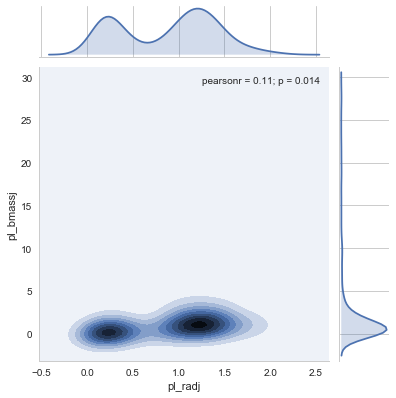

In [135]:
import seaborn as sb
#set plotting style
sb.set_style('whitegrid')


ax = sb.jointplot(x='pl_radj',y='pl_bmassj', data=rm, kind="kde")
#ax.axis(xlabel='Radius (M_J)', ylabel='Mass (M_J)')

bug: xlabel does not show; log does not render well

# Kepler's law

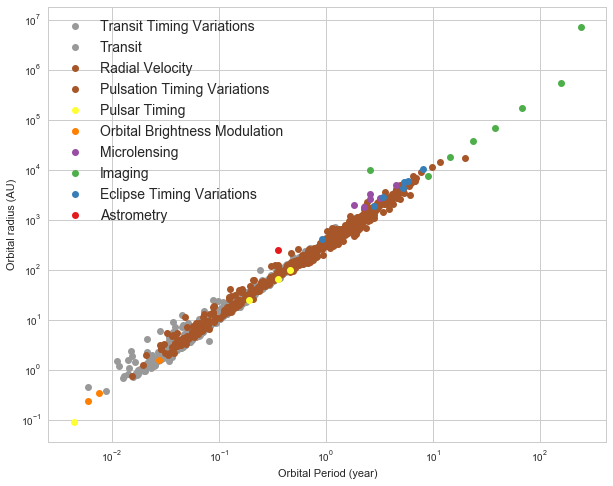

In [136]:
#set font size
plt.rcParams.update({'font.size': 18})

groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in list(zip(groups,colors))[::-1]: 
    ax.plot(group[1]['pl_orbsmax'],group[1]['pl_orbper'], 'o', color=color,
            label=group[0])#, alpha=0.3);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (year)')
ax.set_ylabel('Orbital radius (AU)')
ax.legend(fontsize=14)

# Stellar density

HAT-P-44-like stars
* teff, uteff, logg, ulogg, feh, ufeh=5300,100, 4.460,0.06, 0.33,0.1

For Sun, up to 150 g/cm3

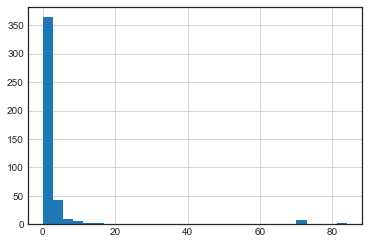

In [44]:
df.st_dens.hist(bins=30)

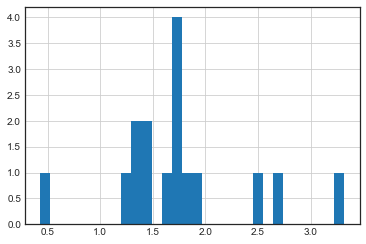

In [43]:
df.query('5000 < st_teff < 5500 and 4 < st_logg < 5 and 0.2 < st_metfe < 0.4').st_dens.hist(bins=30)

# Eccentric and inclined planets 

```
Q: How is it possible to have very eccentric orbits?
Q: For example, why are there mini humps in 0.3, 0.5, and 0.8 in transiting planets? 
```

In [137]:
df_ecc=df[df['pl_orbeccen'] > .1]
df_ecc.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,pl_bmass,pl_bmassE,pl_g_E
26,HAT-P-44,c,Radial Velocity,2014,2,872.200000,1.7520,0.494,NaN,4.000,...,HIRES Spectrometer,10 m Keck I Telescope,2014-05-14,0,Hartman et al. 2014,Hartman et al. 2014,http://exoplanet.eu/catalog/hat-p-44_c/,7.594800e+27,1271.266446,NaN
28,HAT-P-46,b,Transit,2014,1,4.463129,0.0577,0.123,85.5,0.493,...,2K CCD Sensor,Canon 200mm f/1.8L,2014-05-14,0,Hartman et al. 2014,Hartman et al. 2014,http://exoplanet.eu/catalog/hat-p-46_b/,9.360591e+26,156.683589,0.756425
34,HD 142,b,Radial Velocity,2001,2,349.700000,1.0200,0.170,NaN,1.250,...,UCLES Spectrograph,3.9 m Anglo-Australian Telescope,2014-08-21,0,Wittenmyer et al. 2012,Tinney et al. 2002,http://exoplanet.eu/catalog/hd_142_b/,2.373375e+27,397.270764,NaN


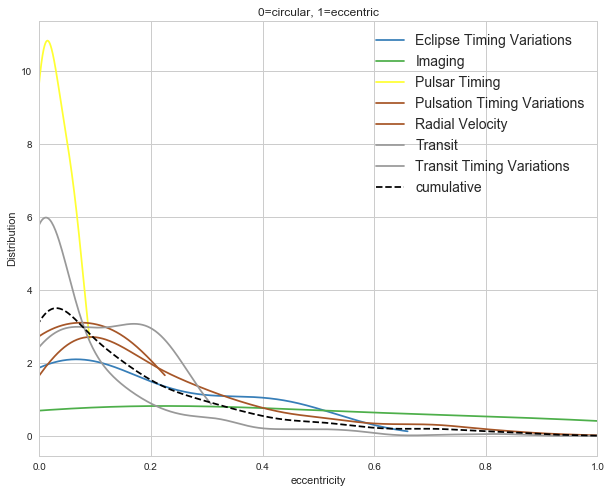

In [138]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbeccen'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].dropna().plot(kind='kde', color=color,label=group[0]);#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative');
ax.set_xlabel('eccentricity')
ax.set_ylabel('Distribution')
ax.set_xlim([0,1])
ax.legend(loc='upper right',fontsize=14)
ax.set_title('0=circular, 1=eccentric')

# Inclined planets

```
Q: How is it possible to have non-coplanar, to the extent of almost perpendicular (incl~0 deg) oblique orbits?
```

In [139]:
df_inc=df[df['pl_orbincl'] > .1]
df_inc.sort_values(by='pl_orbincl').head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,pl_bmass,pl_bmassE,pl_g_E
1578,HD 88133,b,Radial Velocity,2004,1,3.414867,0.04691,0.050,15.0,1.020,...,HIRES Spectrometer,10 m Keck I Telescope,2016-10-13,0,Piskorz et al. 2016,Fischer et al. 2005,http://exoplanet.eu/catalog/hd_88133_b/,1.936674e+27,324.172944,NaN
316,RR Cae,b,Eclipse Timing Variations,2012,1,4343.500000,5.30000,0.000,17.6,4.200,...,VersArray 1300B CCD Camera,2.15 m Jorge Sahade Telescope,2015-08-27,0,Qian et al. 2012,Qian et al. 2012,http://exoplanet.eu/catalog/rr_cae_b/,7.974540e+27,1334.829768,NaN
1222,HD 128311,b,Radial Velocity,2002,2,453.019000,1.08400,0.303,30.0,1.769,...,HIRES Spectrometer,10 m Keck I Telescope,2015-06-25,0,McArthur et al. 2014,Butler et al. 2003,http://exoplanet.eu/catalog/hd_128311_b/,3.358800e+27,562.217586,NaN


Since most transiting planets are preferentially detected in edge-on (inc=90 deg) geometry, we'll exclude them in the plot below. What's left are non-transiting but inclined planets.

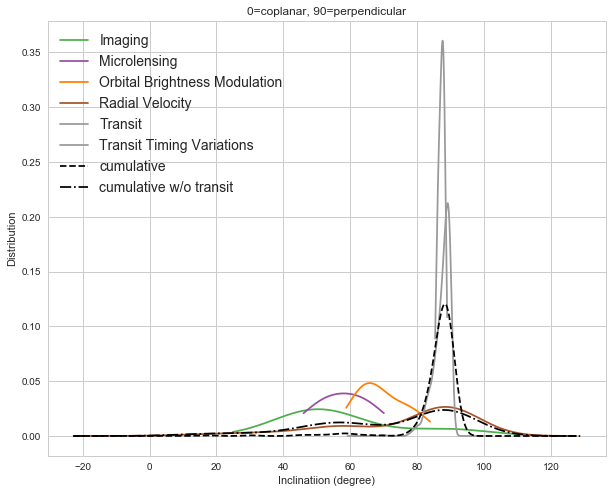

In [140]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbincl'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative');
df.query('pl_discmethod !="Transit"')[param].plot(kind='kde', color='k', linestyle='dashdot',label='cumulative w/o transit');
ax.set_xlabel('Inclinatiion (degree)')
ax.set_ylabel('Distribution')
#ax.set_xlim([0,10])
ax.legend(loc='upper left',fontsize=14)
ax.set_title('0=coplanar, 90=perpendicular')

# Bulk composition: density

```
Q: Why most (transiting) planets have density between H and H2O?
Q: How can several planets have density higher than Iridium (third densest known element)?
   The observational uncertainty cannot even account for this conundrum.
Q: What are the possible internal composition for the planets between H2O and rock (including degeneracies)? 
```

The reference for density is [here](https://en.wikipedia.org/wiki/Density).

What are those planets denser than iron? See [density of metals](http://www.coolmagnetman.com/magconda.htm) for reference.

In [37]:
mr[mr["pl_dens"]>=7.87].dropna() #g/cm3

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k,pl_bmass,pl_bmassE,pl_g_E


Any hints?

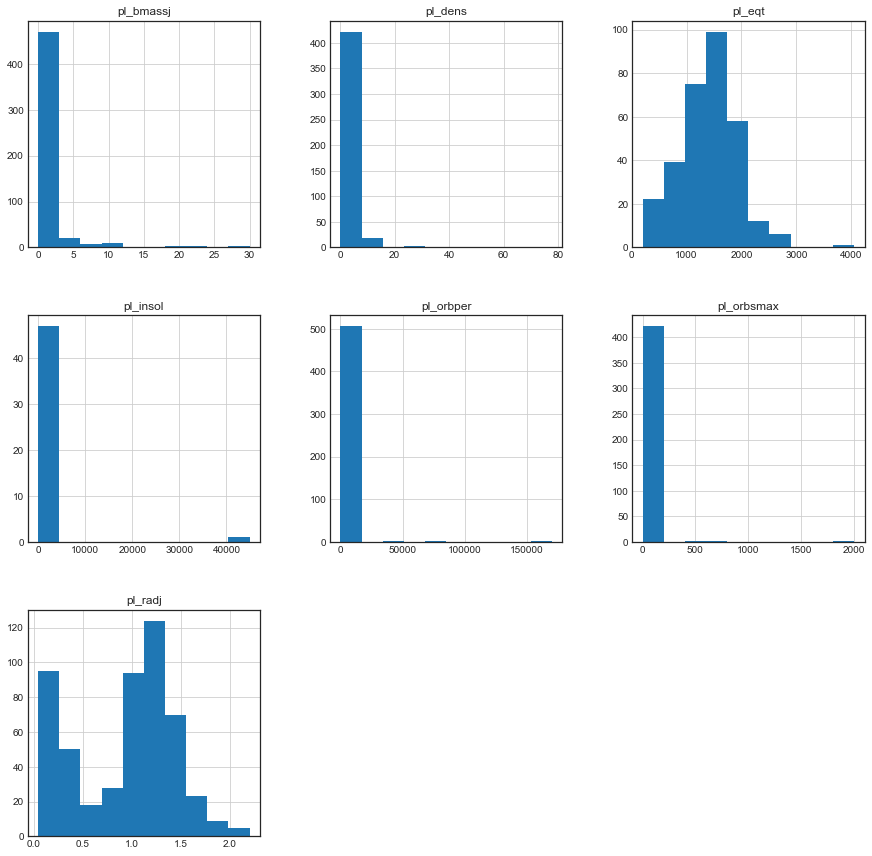

In [38]:
pl_cols = 'pl_bmassj,pl_radj,pl_orbper,pl_orbsmax,pl_dens,pl_insol,pl_eqt'.split(',')
mr[pl_cols].hist(figsize=(15,15));

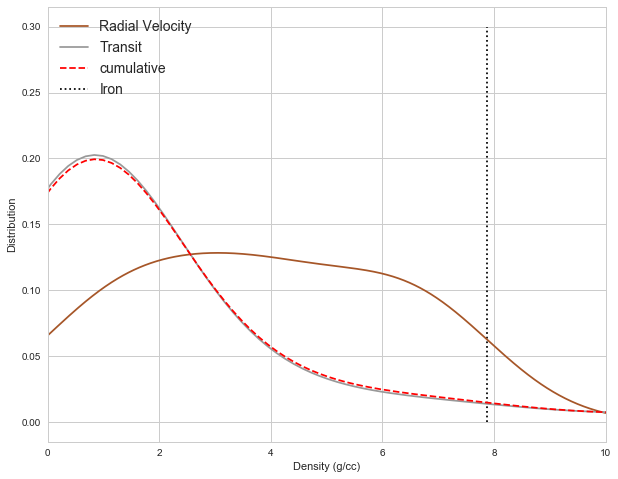

In [142]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_dens'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
plt.vlines(7.874,0, 0.3, linestyles='dotted', label='Iron')
ax.set_xlabel('Density (g/cc)')
ax.set_ylabel('Distribution')
ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(loc='upper left',fontsize=14)

# Planet equilibrium temperature

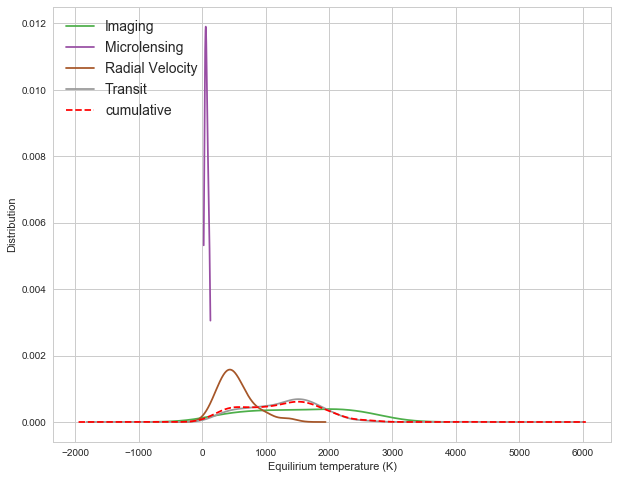

In [143]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_eqt'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_xlabel('Equilirium temperature (K)')
ax.set_ylabel('Distribution')
#ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(loc='upper left',fontsize=14)

# Earth-like planets?

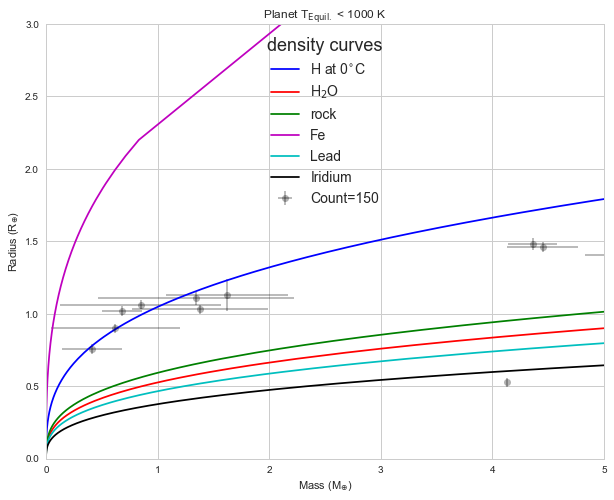

In [144]:
import numpy as np
import mpld3
mpld3.enable_notebook()

from mpld3 import plugins

mass_h2O, mass_Fe, mass_rock, mass_H, mass_lead, mass_iridium  = [],[],[],[],[], []
masses=[mass_h2O, mass_Fe, mass_rock, mass_H, mass_lead, mass_iridium]

rho_h2O, rho_Fe, rho_rock, rho_H, rho_lead, rho_iridium = 1000, 7874, 5510, 89.88, 11340, 21450 #kg/m3
densities=[rho_h2O, rho_Fe, rho_rock, rho_H, rho_lead, rho_iridium]

Mjup,Rjup = 1.898e27,6.9911e7
M_E,R_E = 5.972e24, 6.371e6

rad = df['pl_radj'].sort_values()
for m,d in zip(masses,densities):
    for r in rad*Rjup/R_E:
        m.append(4./3.*np.pi* d *(r)**3) #kg

#eta Earth
eta = df.query('pl_eqt != "NaN" and pl_eqt < 1000')
count = len(eta)

fig, ax = plt.subplots(1,1,figsize=(10,8))
errbar = ax.errorbar(x=eta['pl_bmassj']*Mjup/M_E, y=eta['pl_radj']*Rjup/R_E, 
             xerr=eta['pl_bmassjerr1']*Mjup/M_E, 
             yerr=eta['pl_radjerr1']*Rjup/R_E,
             fmt='ko', alpha=0.3, 
             label='Count={}'.format(count))

labels=['H at 0$^{\circ}$C', 'H$_2$O', 'rock', 'Fe', 'Lead', 'Iridium']
styles='b-,r-,g-,m-,c-,k-'.split(',')
for m,s,l in zip(masses,styles,labels):
    ax.plot(np.array(m)/R_E, rad, s,label=l)

#plt.xscale('log')
#plt.yscale('log')
ax.set_xlim([0,5])
ax.set_ylim([0,3])
ax.set_xlabel('Mass (M$_{\oplus}$)')
ax.set_ylabel('Radius (R$_{\oplus}$)')
ax.set_title('Planet T$_{\mathrm{Equil.}}$ < 1000 K')
ax.legend(title='density curves', fontsize=14)

#add interactive tooltips
labels = ['{0} {1}'.format(i,j) for i,j in zip(eta['pl_hostname'],eta['pl_letter'])]
fig.plugins = [plugins.PointLabelTooltip(errbar, labels)]

mpld3.disable_notebook()

![Trappist planets](figures/trappist-1 planets.png)

![img](figures/Zeng2016b.png)

## Who are they?

In [145]:
df.columns

Index([u'pl_hostname', u'pl_letter', u'pl_discmethod', u'pl_disc', u'pl_pnum',
       u'pl_orbper', u'pl_orbsmax', u'pl_orbeccen', u'pl_orbincl',
       u'pl_bmassj', u'pl_radj', u'pl_radjerr1', u'pl_radjerr2', u'pl_dens',
       u'pl_instrument', u'pl_insol', u'pl_eqt', u'pl_bmassjerr1',
       u'pl_bmassjerr2', u'pl_bmassjerr1.1', u'pl_bmassjerr2.1',
       u'pl_orbpererr1', u'pl_orbpererr2', u'st_optmag', u'ra', u'dec',
       u'st_dist', u'st_teff', u'st_mass', u'st_rad', u'st_plx', u'gaia_plx',
       u'gaia_dist', u'st_pm', u'gaia_pm', u'st_radv', u'st_spstr', u'st_logg',
       u'st_lum', u'st_dens', u'st_metfe', u'st_age', u'st_acts', u'st_bmvj',
       u'st_jmh2', u'pl_instrument.1', u'pl_telescope', u'rowupdate',
       u'st_nplc', u'pl_def_refname', u'pl_disc_refname', u'pl_pelink',
       u'pl_bmass', u'pl_bmassE', u'pl_g_E'],
      dtype='object')

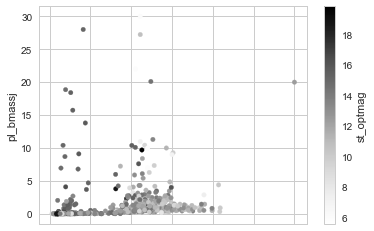

In [146]:
df.plot(x='pl_radj',y='pl_bmassj',c='st_optmag',kind='scatter')

In [71]:
eta['pl_hostname'].values

array(['HAT-P-54', 'HATS-6', 'Kepler-20', 'Kepler-20', 'Kepler-22',
       'HIP 116454', 'K2-3', 'HAT-P-11', 'Kepler-10', 'Kepler-36',
       'Kepler-36', 'Kepler-38', 'Kepler-39', 'Kepler-42', 'Kepler-42',
       'Kepler-42', 'Kepler-46', 'Kepler-51', 'Kepler-51', 'Kepler-51',
       'Kepler-62', 'Kepler-62', 'Kepler-62', 'Kepler-62', 'Kepler-69',
       'Kepler-69', 'PH2', 'Kepler-87', 'KOI-94', 'Kepler-75', 'HD 219134',
       'K2-26', 'Kepler-167', 'Kepler-167', 'HATS-17', 'TRAPPIST-1',
       'TRAPPIST-1', 'TRAPPIST-1', 'K2-4', 'K2-5', 'K2-5', 'K2-7', 'K2-8',
       'K2-9', 'K2-19', 'K2-19', 'K2-14', 'K2-15', 'K2-16', 'K2-17',
       'K2-18', 'GJ 3021', 'HD 7924', 'HD 7924', 'HAT-P-12', 'HAT-P-15',
       'HAT-P-17', 'HAT-P-18', 'CFBDSIR J145829+101343', 'Kepler-167',
       'Kepler-167', 'HD 20794', 'HD 20794', 'CoRoT-10', 'CoRoT-24',
       'HD 164922', 'Kepler-117', 'Kepler-117', 'HD 85512', 'HD 330075',
       'HD 192310', 'K2-28', 'K2-32', 'K2-32', 'K2-32', 'Kepler-130',
    

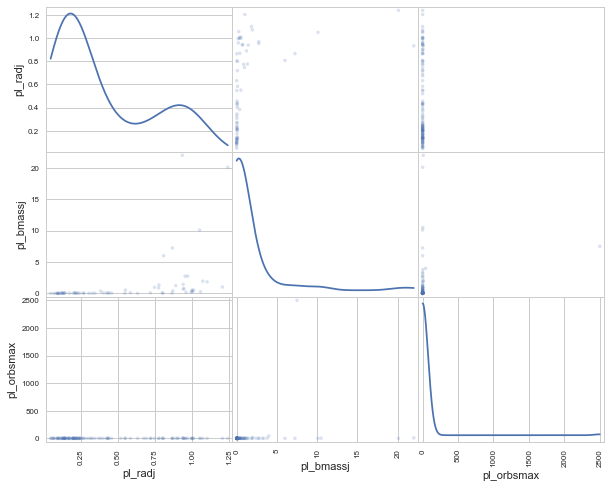

In [47]:
try:
    from pandas.plotting import scatter_matrix
except:
    from pandas.tools.plotting import scatter_matrix
    
scatter_matrix(eta[['pl_radj', 'pl_bmassj', 'pl_orbsmax']], alpha=0.2, diagonal='kde', figsize=(10,8));

# Pairplots
This is a powerful way to survey relationship among variables. A particular scattered pairplot implies no correlation while a distribution with a definite slope implies otherwise. Be sure to try varying the keyword parameters.

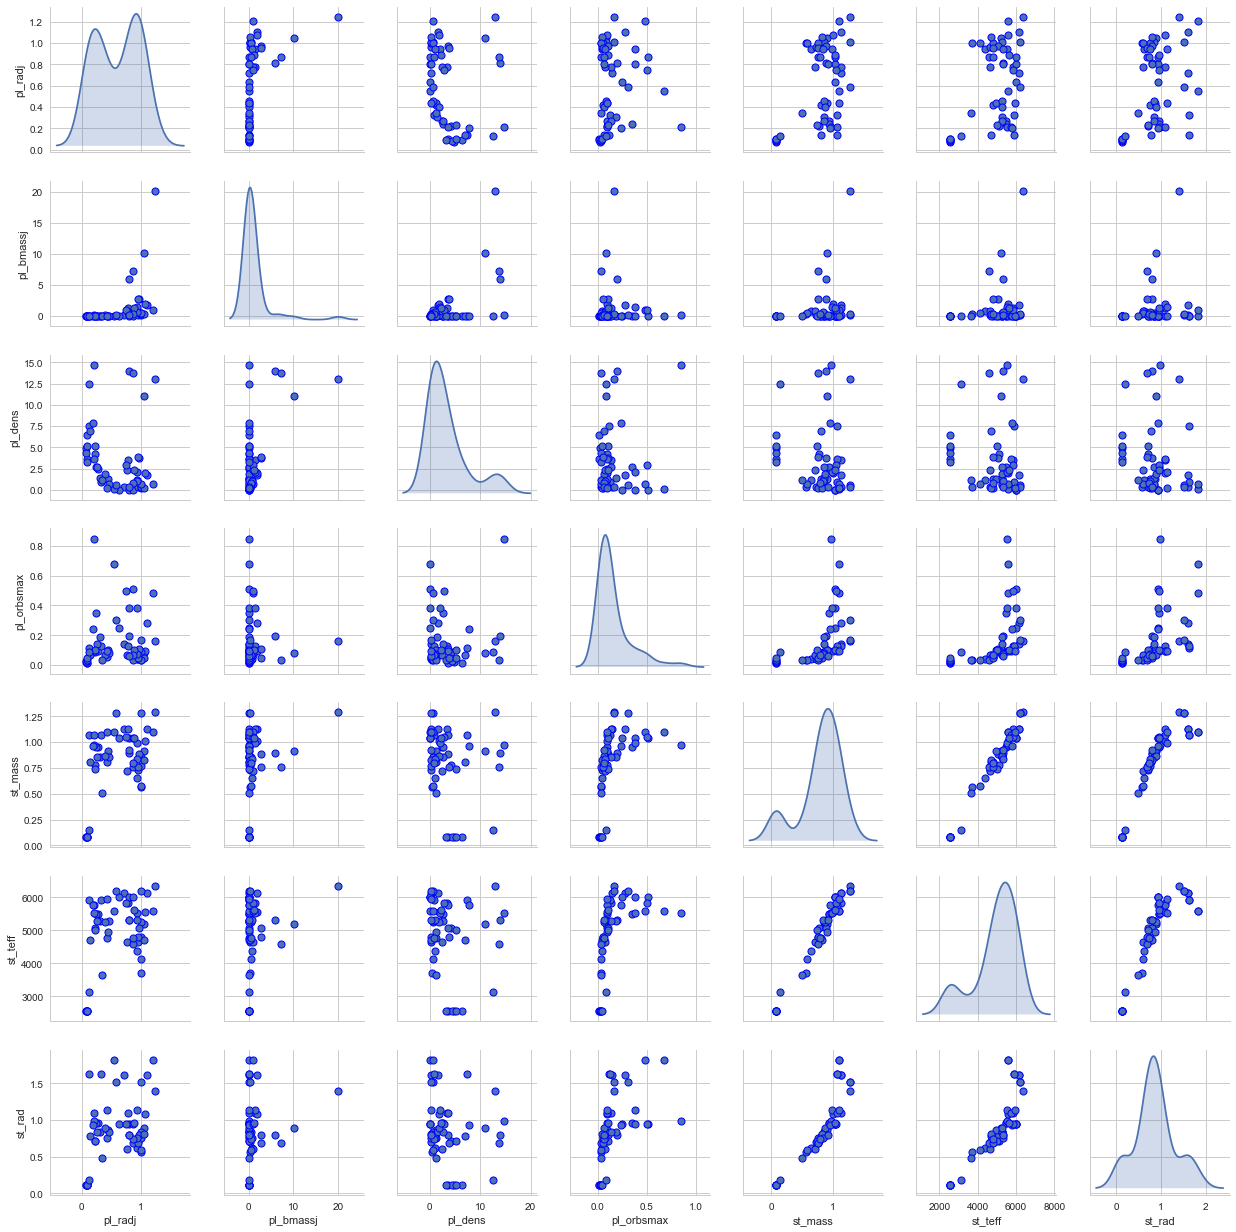

In [48]:
import seaborn as sb
sb.set_style('whitegrid')

variables=eta[['pl_radj', 'pl_bmassj', 'pl_dens', 'pl_orbsmax',"st_mass","st_teff","st_rad"]].dropna()
sb.pairplot(variables, diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True));
#, hue="pl_discmethod", markers="+"

# Habitable zone (Predicted)

The Habitable Zone (HZ) is the region around a star in which water can exist in liquid form.

The Exoplanet Archive stores HZ values derived using the algorithm described by [Kasting et al. (1993)](http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=1993Icar..101..108K). The algorithm calculates the inner and outer boundaries of the habitable zone based on the effective temperature and luminosity of the parent star. For example, the HZ for the Sun is approximately 0.7-1.0 AU. 

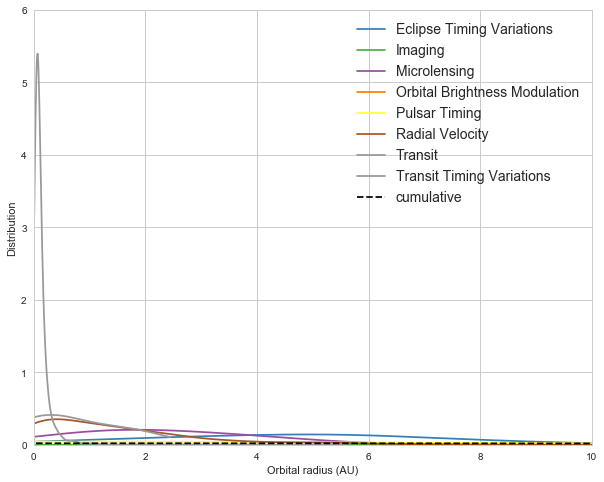

In [49]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbsmax'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Orbital radius (AU)')
ax.set_ylim([0,6])
ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(fontsize=14)

# Insolation Flux

[Insolation Flux](https://exoplanetarchive.ipac.caltech.edu/docs/poet_calculations.html)
```
Q: Why insolation flux is mostly derived from RV technique.
```

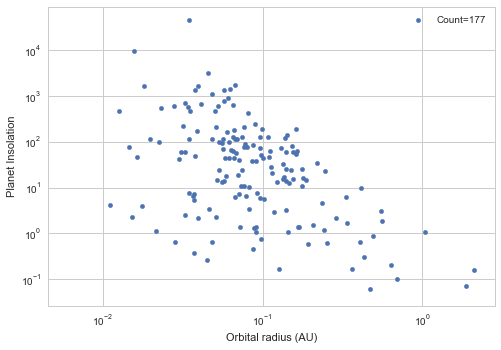

In [50]:
count=len(df['pl_insol'].dropna())
ax = df.plot.scatter(x='pl_orbsmax',y='pl_insol',label='Count={}'.format(count))
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis('tight')
ax.set_ylabel('Planet Insolation')
ax.set_xlabel('Orbital radius (AU)')

# Stellar age
```
Q: Why directly imaged planets are found around ~1 Gyr host stars? 
A: Young planets (around recently-formed stars) are self-luminous such that they are bright in the infrared and hence easier to image directly.

Q: Why RV planets have broader dispersion in age? 
```

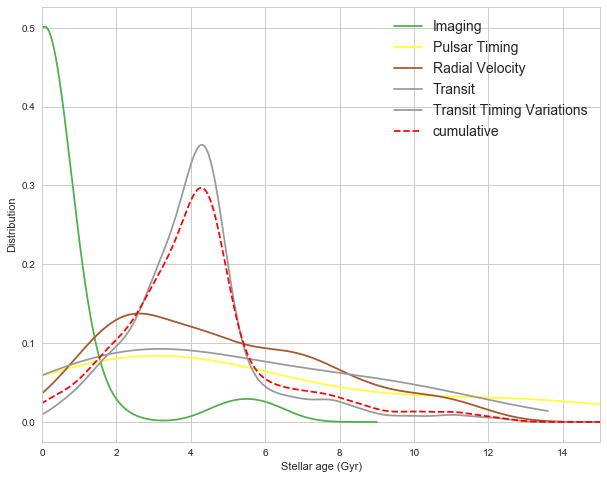

In [51]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1]['st_age'].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df['st_age'].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar age (Gyr)')
ax.set_xlim([0,15])
ax.legend(fontsize=14)

# Stellar effective temperature

```
Q: Why planets around solar-type (~5-6k K) stars are so common?
Q: Why is there a second hump towards hotter host stars for DI planets?
Q: Why is there a second hump towards cooler (e.g. red dwarfs) host stars for RV planets?
```

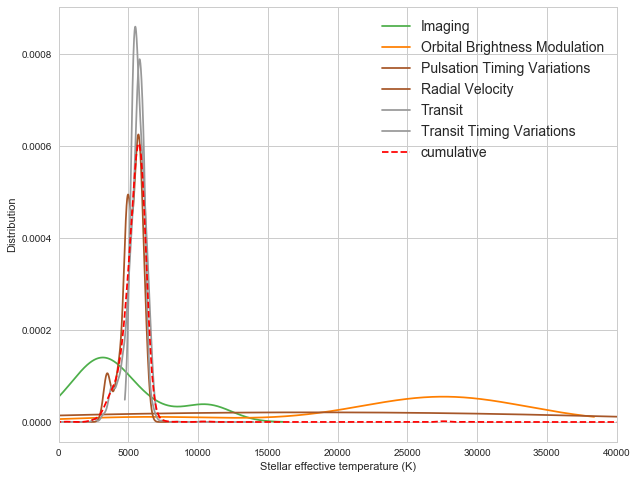

In [52]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_teff'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar effective temperature (K)')
ax.set_xlim([0,4e4])
ax.legend(fontsize=14)

# Stellar activity

Chromospheric activity as measured by the S-index (ratio of the emission of the H and K Ca lines to that in nearby continuum).

```
Q: What are the effects of stellar activity on short-period (RV) planets?
```

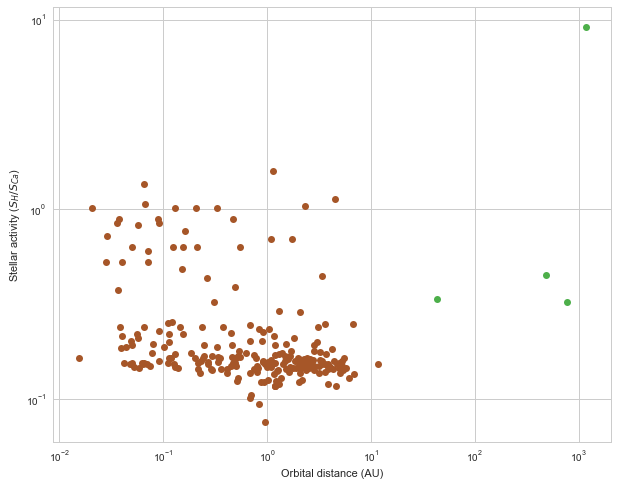

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        ax.plot(group[1]['pl_orbsmax'],group[1]['st_acts'], 'o', color=color,label=group[0]);#, alpha=0.3);
    except Exception:
        pass
ax.set_xlabel('Orbital distance (AU)')
ax.set_ylabel('Stellar activity ($S_H/S_{Ca}$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis('tight');
#ax.legend(['RV','Imaging'],fontsize=14)

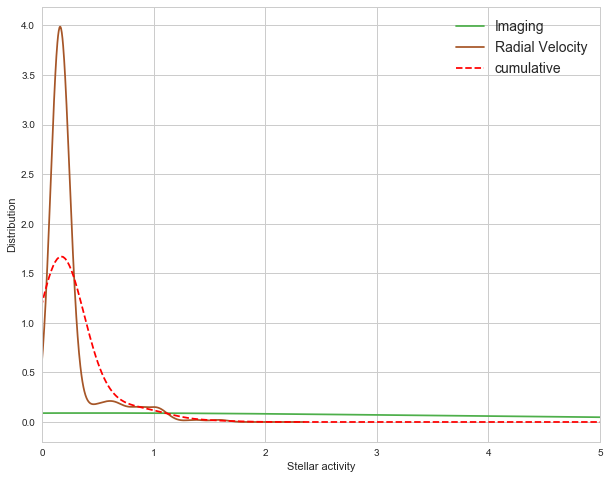

In [54]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_acts'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar activity')
ax.set_xlim([0,5])
ax.legend(fontsize=14)

# Color

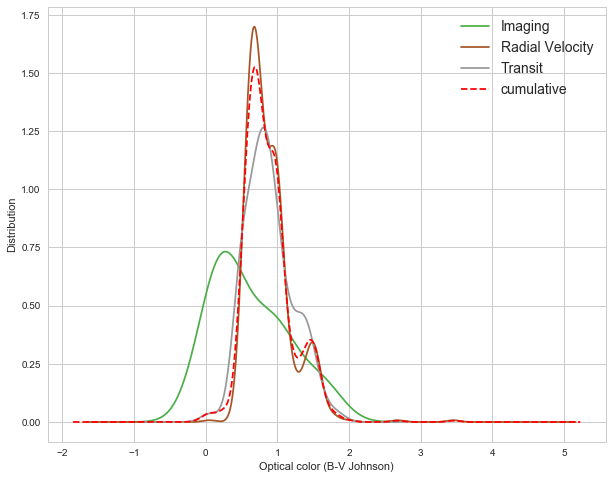

In [55]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_bmvj'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Optical color (B-V Johnson)')
#ax.set_xlim([0,5])
ax.legend(fontsize=14)

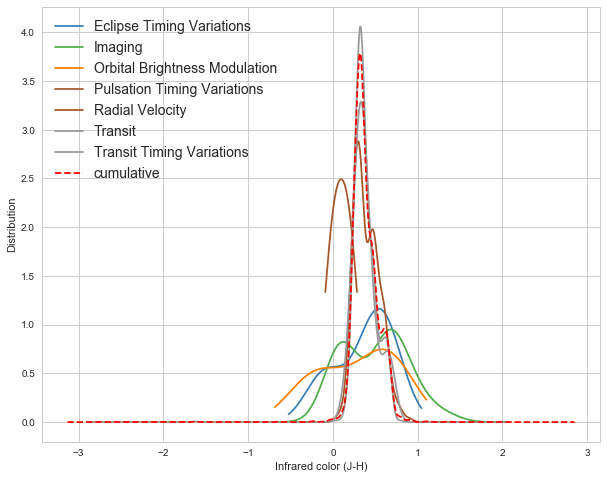

In [56]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_jmh2'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Infrared color (J-H)')
#ax.set_xlim([0,5])
ax.legend(fontsize=14)

## Questions
### How many have stars have multiple planets detected?

In [57]:
df['pl_hostname'].value_counts().head()

KOI-351       7
TRAPPIST-1    7
HD 10180      6
Kepler-20     6
Kepler-11     6
Name: pl_hostname, dtype: int64

### Planet in mean motion resonance

Few multiplanetary systems are known to be in mean motion resonance. The longest system in near-resonance is TRAPPIST-1 (Gillon et al. 2017). Another is Kepler 223 which Mills et al. (2016) propsed to be a by-product of inward migration. How many system have mean motion resonances and are these systems' architectures similar or different? Does these systems have inner planet (or outer planet) that might indicate migration?    

In [58]:
#non-unique names of multiplanet systems; e.g. HR8799 has 4 entries for b,c,d,e
df['pl_pnum'].value_counts()

1    2029
2     764
3     375
4     192
5     100
6      24
7      14
Name: pl_pnum, dtype: int64

In [59]:
#unique names of multiplanet systems
multiple_system = df['pl_hostname'].value_counts()#.index

multiple_system[:5]

KOI-351       7
TRAPPIST-1    7
HD 10180      6
Kepler-20     6
Kepler-11     6
Name: pl_hostname, dtype: int64

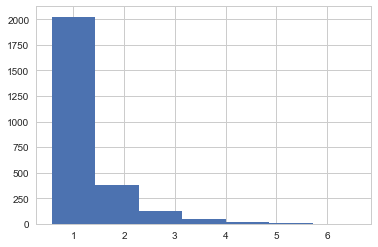

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
#multiple_system.plot(bins=6,kind='hist', normed=True)
plt.hist(multiple_system, bins=7, align='left');

Check whether some of these multiplanetary system exhibit planet-planet occultations using [planetplanet](https://github.com/rodluger/planetplanet) software.

### Sample

see also KOI-351

In [61]:
from fractions import Fraction as F

#must be sorted accdg to planet letter
var=df.query('pl_hostname == "TRAPPIST-1"').sort_values('pl_letter')
a=var.pl_orbper.values
err=max(var.pl_orbpererr1.values)
#count sig fig
SF = len(str(err)) -1 
print('ratio of neighbor orbits:\n')
for i in range(len(a)-1):
    ans=a[i+1]/a[i]
    print('{0:.4f}; {1}'.format(ans, F(ans))) #SF=.4

ratio of neighbor orbits:

1.6029; 7218964347744057/4503599627370496
1.6721; 1882654082050065/1125899906842624
1.5062; 3391712268725073/2251799813685248
1.5094; 3398841209921911/2251799813685248
1.3417; 3021319061515599/2251799813685248
1.5192; 1710504831377431/1125899906842624


Kepler-223--known in near-resonance

In [62]:
a=df.query('pl_hostname == "Kepler-223"').sort_values('pl_letter').pl_orbper.values
for i in range(len(a)-1):
    print(a[i+1]/a[i])

1.33328638809
1.50205471661
1.33383484271


### YSOs with outer planet

In [63]:
yso = df.query('10 < pl_orbsmax < 1000 and st_age < 0.01')
yso.pl_discmethod.value_counts()

Imaging    13
Name: pl_discmethod, dtype: int64

In [64]:
yso.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_acts,st_bmvj,st_jmh2,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_bmass,pl_bmassE,pl_g_E
429,HIP 78530,b,Imaging,2010,1,NaN,740.0,NaN,NaN,23.0,...,NaN,0.077,-0.018,NIRI Camera,8.19 m Gemini North Telescope,2015-04-01,0,4.367010e+28,7309.782063,NaN
1368,DH Tau,b,Imaging,2004,1,NaN,330.0,NaN,NaN,11.0,...,NaN,NaN,0.943,CIAO Camera,8.2 m Subaru Telescope,2014-05-14,0,2.088570e+28,3495.982726,NaN
1447,HD 100546,b,Imaging,2014,1,NaN,53.0,NaN,NaN,NaN,...,NaN,0.003,0.463,NACO Camera,8.2 m ESO VLT UT4 Yepun Telescope,2015-05-14,0,NaN,NaN,NaN


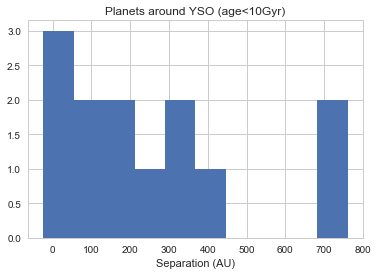

In [65]:
#yso['pl_orbsmax'].plot(bins=10, kind='hist')
plt.hist(yso['pl_orbsmax'], bins=10, align='left');
plt.title('Planets around YSO (age<10Gyr)')
plt.xlabel('Separation (AU)')

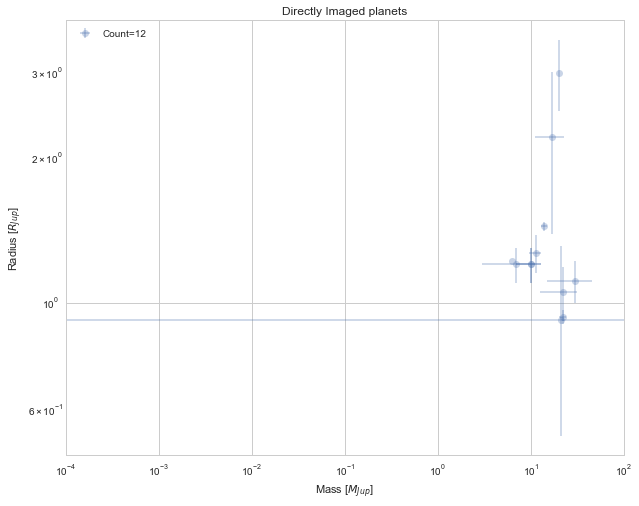

In [66]:
df_DI = groups.get_group('Imaging')

DI_count = len(df_DI.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.errorbar(x=df_DI['pl_bmassj'], y=df_DI['pl_radj'], xerr=df_DI['pl_bmassjerr1'], 
             yerr=df_DI['pl_radjerr1'],fmt='o', alpha=0.3, label='Count={}'.format(DI_count))


ax.set_xlabel('Mass [$M_{Jup}$]')
ax.set_ylabel('Radius [$R_{Jup}$]')
ax.set_xlim([1e-4,1e2])
ax.set_title('Directly Imaged planets')

if True:
    ax.set_xscale('log')
    ax.set_yscale('log')
    
leg = plt.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

### Density-based colormap

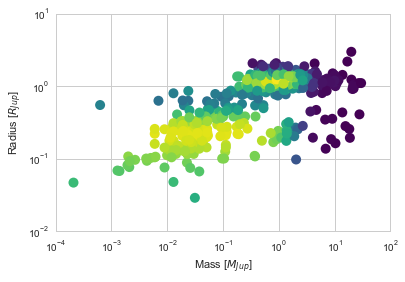

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x=df[['pl_radj', 'pl_bmassj']].dropna()['pl_bmassj'].values
y=df[['pl_radj', 'pl_bmassj']].dropna()['pl_radj'].values

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='', cmap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-4,1e2])
ax.set_ylim([1e-2,1e1])

plt.xlabel('Mass [$M_{Jup}$]')
plt.ylabel('Radius [$R_{Jup}$]')

In [73]:
#useful constants
M_E = 5.972e24 #kg
a_E = 149.60e6 #m 
R_E = 6371e3 #km
P_E = 365 #d

M_J = 1.898e27 #kg
a_J = 778.57e6 #m
R_J = 69911e3 #m
P_J = 11.86*P_E

M_N = 1.024e26
a_N = 4495.06e6 #m
R_N = 24622e3 #m
P_N = 164.8*P_E

Alternatively, there are libraries such as `astropy` that have built in constants. This is especially useful for unit conversion. 

In [74]:
from astropy import constants as const

M_J = const.M_jup #kg
R_J = const.R_jup #m

M_E = const.M_earth
R_E = const.R_earth

In [75]:
M_J.si, M_J.cgs

(<Constant name=u'Jupiter mass' value=1.8987e+27 uncertainty=5e+22 unit='kg' reference=u"Allen's Astrophysical Quantities 4th Ed.">,
 <Quantity 1.8987e+30 g>)

## Asteroseismology of Directly Imaged Host Stars

* presentation ([google slides](https://docs.google.com/presentation/d/1PYInXqZjUXN4f54VQb_tudQ7sgIJsGZ3FxsedjfbPjQ/edit#slide=id.p12))

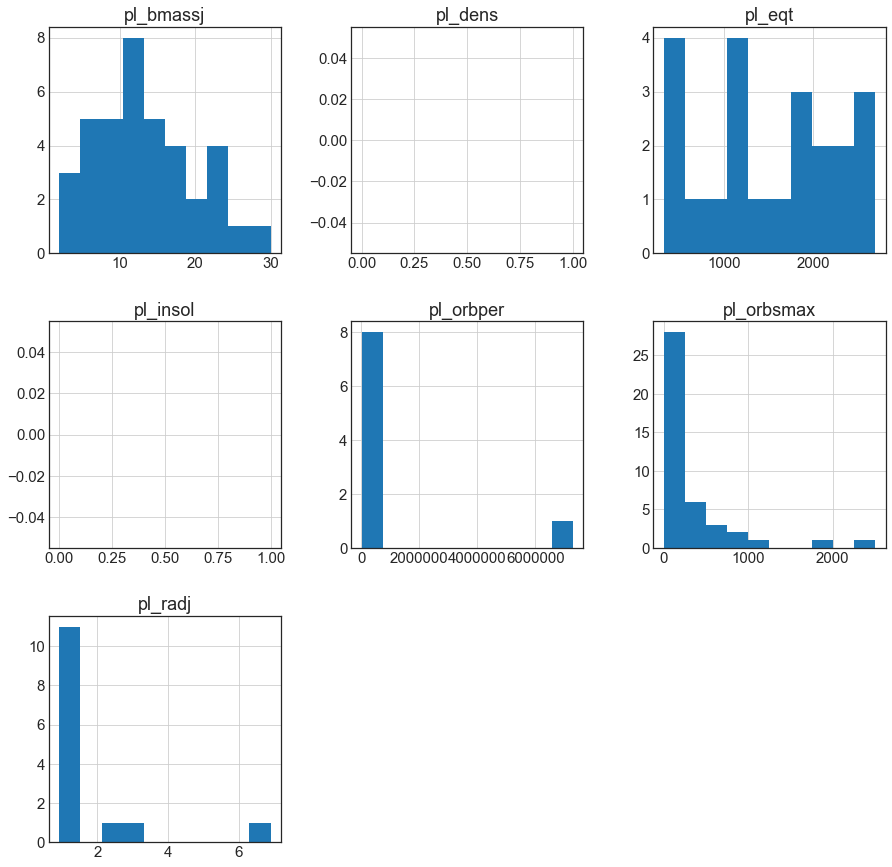

In [7]:
imaging = df.query('pl_discmethod == "Imaging"')

pl_cols = 'pl_bmassj,pl_radj,pl_orbper,pl_orbsmax,pl_dens,pl_insol,pl_eqt'.split(',')
imaging[pl_cols].hist(figsize=(15,15));

In [8]:
df.columns

Index(['pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_disc', 'pl_pnum',
       'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_dens', 'pl_trandep',
       'pl_instrument', 'pl_insol', 'pl_eqt', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjerr1.1', 'pl_bmassjerr2.1', 'pl_orbpererr1', 'pl_orbpererr2',
       'st_optmag', 'ra', 'dec', 'st_dist', 'st_teff', 'st_mass', 'st_rad',
       'st_plx', 'gaia_plx', 'gaia_dist', 'st_pm', 'gaia_pm', 'st_radv',
       'st_spstr', 'st_logg', 'st_lum', 'st_dens', 'st_metfe', 'st_age',
       'st_acts', 'st_bmvj', 'st_jmh2', 'pl_instrument.1', 'pl_telescope',
       'rowupdate', 'st_nplc', 'pl_def_refname', 'pl_disc_refname',
       'pl_pelink', 'st_j', 'st_h', 'st_k'],
      dtype='object')

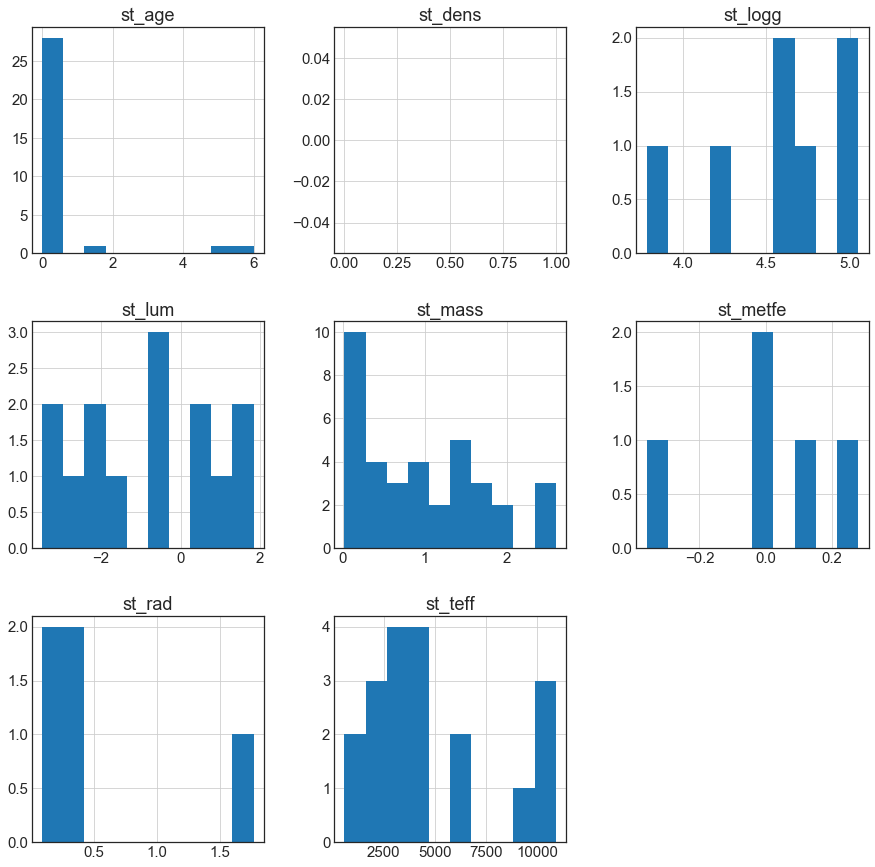

In [9]:
st_cols = 'st_teff,st_mass,st_rad,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age'.split(',')
imaging[st_cols].hist(figsize=(15,15));

### Luminosity and age

* see gallery by [Burrows](https://www.astro.princeton.edu/~burrows/david.html) 

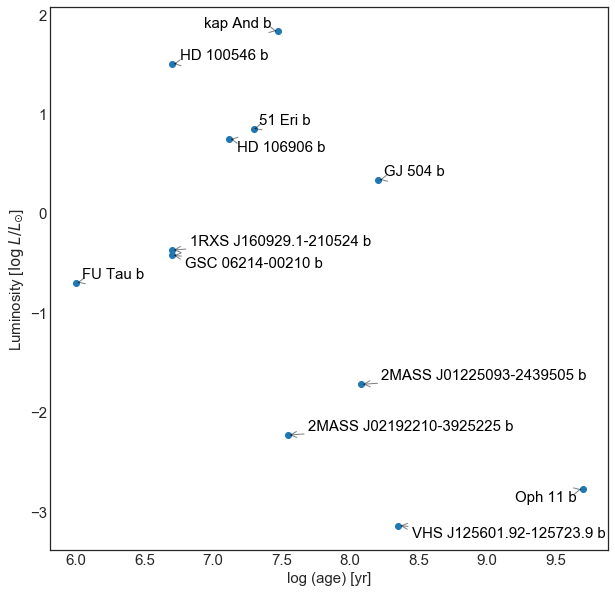

In [40]:
from adjustText import adjust_text

fig = pl.figure(figsize=(10,10))

#,pl_bmassjerr1,pl_bmassjerr2
cols = 'pl_hostname,pl_letter,st_lum,st_age'.split(',')
al = imaging[cols].dropna()

#convert Gyr to yr
a = al['st_age'].apply(lambda x: x*1e9).values
loga = np.log10(a)
l = al['st_lum'].values

pl.plot(table[''])

pl.errorbar(loga,l,linestyle='',fmt='o')
#pl.scatter(a,m)
#pl.semilogx(a,m,marker='o',linestyle='')
#pl.xscale('log')

names   = al['pl_hostname'].values
letters = al['pl_letter'].values

#add names
texts=[]
for x,y,n,l in zip(loga,l,names,letters):
    text='{} {}'.format(n,l)
    texts.append(pl.text(x,y,text,color='k'))
    
adjust_text(texts, force_text=1, fontsize=10,
            arrowprops=dict(arrowstyle="->",
                            color='k', alpha=0.5))
#pl.loglog(True)
pl.xlabel('log (age) [yr]')
pl.ylabel('Luminosity [$\log\;L/L_{\odot}$]')

### Stellar Age- Planet Mass

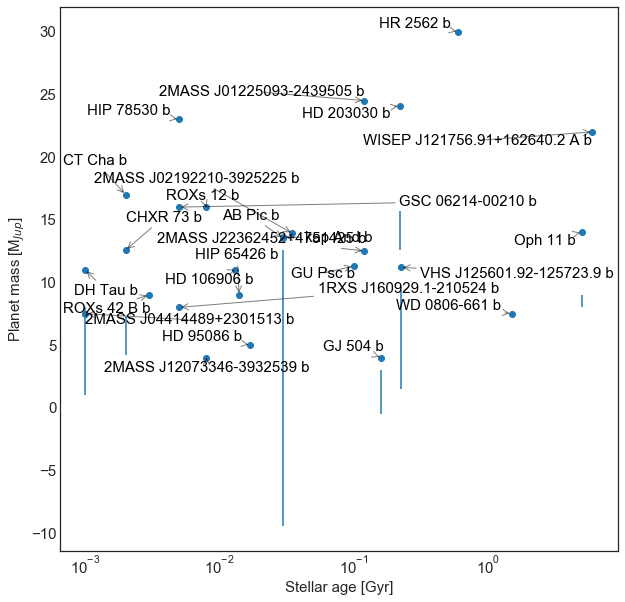

In [10]:
from adjustText import adjust_text

fig = pl.figure(figsize=(10,10))

#,pl_bmassjerr1,pl_bmassjerr2
cols = 'pl_hostname,pl_letter,pl_bmassj,st_age,pl_bmassjerr1,pl_bmassjerr2'.split(',')
ma = imaging[cols].dropna()

a = ma['st_age'].values
m = ma['pl_bmassj'].values
m_err = [ma['pl_bmassjerr1'].values, ma['pl_bmassjerr2'].values]

pl.errorbar(a,m,yerr=m_err, fmt='o',capthick=2)
#pl.scatter(a,m)
#pl.semilogx(a,m,marker='o',linestyle='')
pl.xscale('log')

names   = ma['pl_hostname'].values
letters = ma['pl_letter'].values

#add names
texts=[]
for x,y,n,l in zip(a,m,names,letters):
    text='{} {}'.format(n,l)
    texts.append(pl.text(x,y,text,color='k'))
    
adjust_text(texts, force_text=1, fontsize=10,
            arrowprops=dict(arrowstyle="->",
                            color='k', alpha=0.5))
#pl.loglog(True)
pl.xlabel('Stellar age [Gyr]')
pl.ylabel('Planet mass [M$_{Jup}$]')

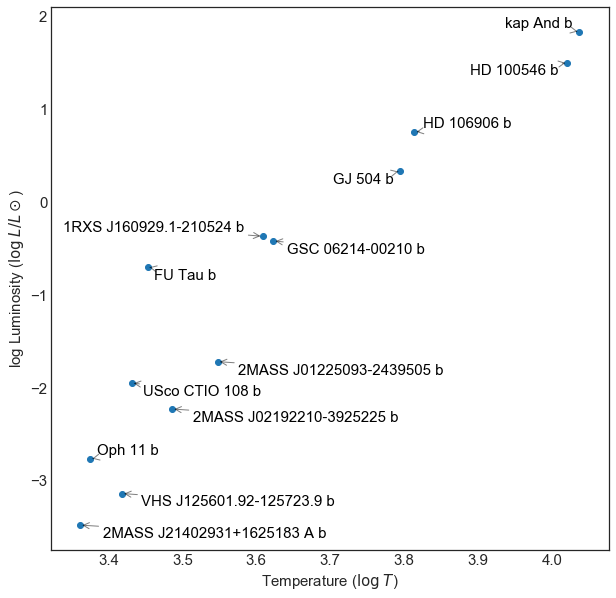

In [32]:
from adjustText import adjust_text

fig = pl.figure(figsize=(10,10))

#,pl_bmassjerr1,pl_bmassjerr2
cols = 'pl_hostname,pl_letter,st_teff,st_lum'.split(',')
tl   = imaging[cols].dropna()

#Tsol = 5770
#logtt    = tl['st_teff'].apply(lambda x: np.log(x/Tsol)).values

t    = tl['st_teff'].values

logt = np.log10(t)
l = tl['st_lum'].values
#logl = np.log(l)

pl.scatter(logt,l)
#pl.xscale('log')

names   = tl['pl_hostname'].values
letters = tl['pl_letter'].values

#add names
texts=[]
for x,y,n,s in zip(logt,l,names,letters):
    text='{} {}'.format(n,s)
    texts.append(pl.text(x,y,text,color='k'))

adjust_text(texts,fontsize=fontsize, va='center', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', alpha=0.5))
#pl.loglog(True)
pl.xlabel('Temperature ($\log\; T$)',fontsize=fontsize)
pl.ylabel('log Luminosity ($\log\; L/L\odot$)',fontsize=fontsize)

#invert x-axis as in Christensen-Dalsgaard plot
#pl.gca().invert_xaxis()

### Luminosity and Mass (at a given age)
* see COND model table by [Baraffe](https://www.aanda.org/articles/aa/full/2003/17/aa3343/aa3343.table.html)

In [60]:
#table1: 0.1 Gyr
#table2: 0.5 Gyr
#table3: 1.0 Gyr
#table4: 5.0 Gyr
#table5: 1.0 Gyr

links = ["https://www.aanda.org/articles/aa/full/2003/17/aa3343/table1.html",
        "https://www.aanda.org/articles/aa/full/2003/17/aa3343/table2.html",
        "https://www.aanda.org/articles/aa/full/2003/17/aa3343/table3.html",
        "https://www.aanda.org/articles/aa/full/2003/17/aa3343/table4.html",
        "https://www.aanda.org/articles/aa/full/2003/17/aa3343/table5.html"]

In [58]:
cols="M/Msol,Teff,logL/Lsol,R/Rsol,logg,Mv,MR,MI,MJ,MH,MK,ML',MM".split(',')

table1 =pd.read_html(links[0],skiprows=[0,1])[0]
table1.columns = cols
table1.head(3)

,M/Msol,Teff,logL/Lsol,R/Rsol,logg,Mv,MR,MI,MJ,MH,MK,ML',MM
0,0.001,309.0,-6.957,0.117,3.300,32.58,28.68,25.89,22.43,22.38,29.11,17.41,15.69
1,0.002,425.0,-6.383,0.120,3.580,29.69,25.62,22.79,20.05,19.76,23.13,15.94,14.55
2,0.003,493.0,-6.112,0.121,3.746,28.71,24.48,21.66,18.88,18.57,20.88,15.21,13.93


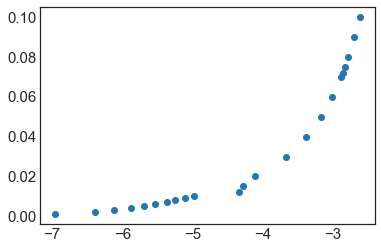

In [59]:
l = table1["logL/Lsol"].values
m = table1["M/Msol"].values

pl.plot(l,m,'o')

## mass-radius

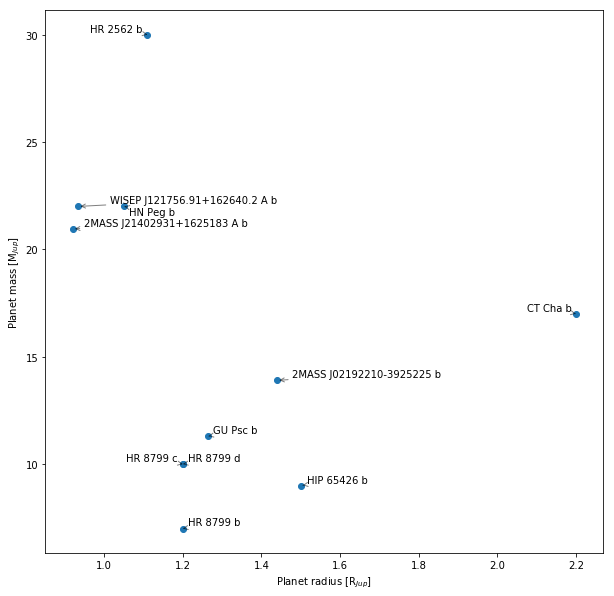

In [53]:
from adjustText import adjust_text

fig = pl.figure(figsize=(10,10))

cols = 'pl_hostname,pl_letter,pl_radj,pl_bmassj,pl_radjerr1,pl_radjerr2,pl_bmassjerr1,pl_bmassjerr2'.split(',')
rm = imaging[cols].dropna()

r = rm['pl_radj'].values
m = rm['pl_bmassj'].values
r_err = [rm['pl_radjerr1'].values, rm['pl_radjerr2'].values]
m_err = [rm['pl_bmassjerr1'].values, rm['pl_bmassjerr2'].values]

#pl.errorbar(r,m,xerr=r_err,yerr=m_err, fmt='--o',capthick=2)
pl.scatter(r,m)

names   = rm['pl_hostname'].values
letters = rm['pl_letter'].values

#add names
texts=[]
for x,y,n,l in zip(r,m,names,letters):
    text='{} {}'.format(n,l)
    texts.append(pl.text(x,y,text,color='k'))
    
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="->",
                                                    color='k', alpha=0.5))

pl.xlabel('Planet radius [R$_{Jup}$]')
pl.ylabel('Planet mass [M$_{Jup}$]')